In [1]:
"""
Created on Fri May 27 09:17:01 2022

@author: a2326
"""
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
#the below image alignment is not good it doesnt crop images
# for image alignment
# https://scikit-image.org/docs/stable/auto_examples/registration/plot_register_translation.html
from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift
import imageio
from PIL import Image
from numpy.ma import masked_array
%run -i main.ipynb

In [8]:
#conda activate jenv

In [3]:
#!jupytext --to notebook SECCM_202305.py

In [4]:
#!jupytext --to notebook Tracking_oxidation/temperatureseries-KTi3C2.py

In [5]:
#!jupytext --to notebook  FewLayered-OKedge-ReferenceSpectrum.py

In [6]:
from ipywidgets import Dropdown
options = ['option 1', 'option 2', 'option 3']
dropdown = Dropdown(options=options)
display(dropdown)

Dropdown(options=('option 1', 'option 2', 'option 3'), value='option 1')

In [7]:
import numpy as np

# Open the .dat file
file_path = "F:/CV_data_Faidra.dat"  # Replace "data.dat" with the path to your .dat file
with open(file_path, 'r') as file:
    # Read the data from the file
    data = np.genfromtxt(file, delimiter='')  # Assuming columns are separated by commas

# Separate the data into four arrays
column1 = data[:, 0]
column2 = data[:, 1]
column3 = data[:, 2]
column4 = data[:, 3]

# Print the arrays (optional)
print("Column 1:", column1)
print("Column 2:", column2)
print("Column 3:", column3)
print("Column 4:", column4)

Column 1: [2.68060017 2.67884111 2.67568707 ... 2.68609929 2.68307042 2.68107009]
Column 2: [-0.00161395 -0.00400585 -0.00670668 ...  0.02869649  0.02822443
  0.02787431]
Column 3: [2.68010449 2.67848873 2.67534709 ... 2.68606782 2.68300796 2.68095565]
Column 4: [0.02774938 0.0275034  0.02703085 ... 0.03076363 0.03040702 0.03013431]


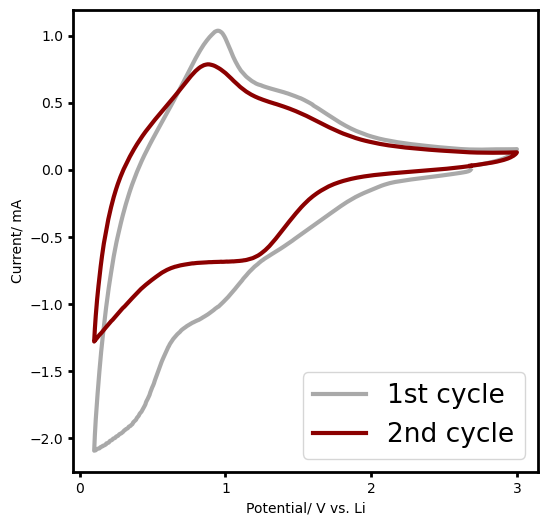

In [8]:
import matplotlib.pyplot as plt
fig, ax2 = plt.subplots(1, 1, figsize=(6, 6))
plt.plot(column1,column2,color='darkgray',linewidth=3,label='1st cycle')
plt.plot(column3,column4,color='darkred',linewidth=3,label='2nd cycle')
plt.rcParams['font.size'] = '18'
matplotlib.rcParams.update({'font.size': 19})
#plt.minorticks_on()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        #ax2.tick_params(which='minor',width=2)
plt.xlabel('Potential/ V vs. Li')
plt.ylabel('Current/ mA')
plt.legend()
#plt.xlim([528,532])
#plt.ylim([0.1,0.5])
#plt.yticks([])

<img src="euromat1_sxminstrumentation_12.gif">

### $$\textbf{A1. Sonicated multi-layered MXene at O K-edge, electrochemically cycled for 2 cycles (from 3V to 0V)}$$
<hr>

### $$\textbf{STEP 1: Data acquisition:Transmission image}$$
<hr>

['data_tey', 'data_tey_aligned', 'data_trans_aligned', 'data_trans_whitened', 'exchange', 'implements', 'information', 'shift', 'spectromicroscopy', 'version']
Transmission image


C:\Users\a2326\AppData\Local\Temp\ipykernel_10764\3673671460.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  resox=round(float((-f['exchange/x'][...][0]+f['exchange/x'][...][-1])/f['exchange/x'][...].shape),2)
C:\Users\a2326\AppData\Local\Temp\ipykernel_10764\3673671460.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  resoy=round(float((-f['exchange/y'][...][0]+f['exchange/y'][...][-1])/f['exchange/y'][...].shape),2)


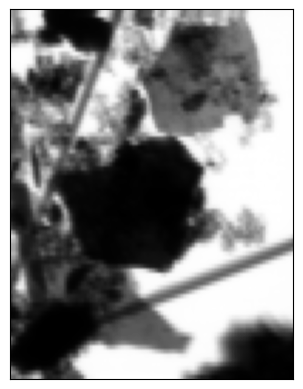

In [16]:
#loading stxm data
filename='MPI_210723146'
f=h5py.File(filename+'.hdf','r')
energy=f['exchange/energy'][...]
data_trans=np.transpose((f['exchange/data'][...]),(1,0,2))
print(list(f.keys()))
print('Transmission image')
data_trans_unfold=data_trans.reshape(data_trans.shape[0]* data_trans.shape[1], data_trans.shape[2])
resox=round(float((-f['exchange/x'][...][0]+f['exchange/x'][...][-1])/f['exchange/x'][...].shape),2)
resoy=round(float((-f['exchange/y'][...][0]+f['exchange/y'][...][-1])/f['exchange/y'][...].shape),2)
noscale(data_trans.mean(2),resox,resoy,'gray')
noscale(data_trans.mean(2), resox, resoy,'gray')
#loading tey data
filename1='F:/jupyter/\TEY-Transmission/'+filename+'/'+filename+'_b'
data_tey=np.zeros((data_trans.shape[0],data_trans.shape[1], data_trans.shape[2]))

### $$\textbf{TEY image}$$
<hr>

Total electron yield image


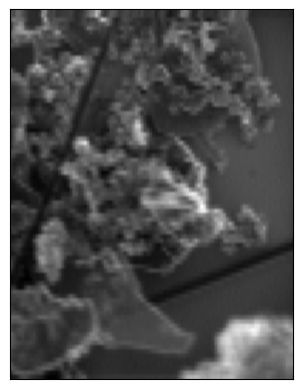

In [17]:
##the measurement 034 is problematic
for i in range(0, data_trans.shape[2], 1):    
 layer=np.genfromtxt(filename1+f"{i:03d}.xim")
 #layer = np.array(layer)
 data_tey[:,:,i]=layer
#data_tey=np.transpose(data_tey, (1,0,2)) 
noscale(data_tey.sum(2), resox, resoy,'gray')
#plt.imshow(data_tey.sum(2), cmap='gray')
print('Total electron yield image')

### $$\textbf{STEP 2: Drift correction}$$
<hr>

shifts


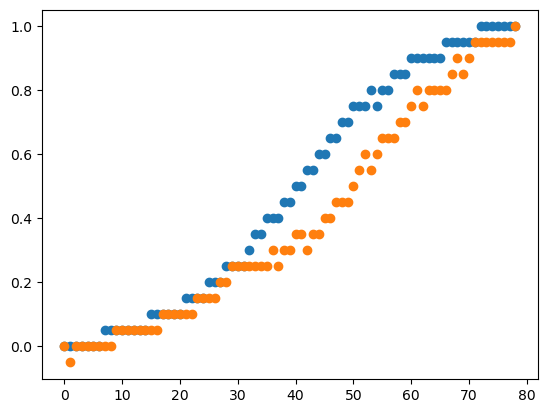

In [18]:
####aligning stxm data##
shift=(alignment(data_trans))[0]
data_aligned=(alignment(data_trans))[1]
print('shifts')
plt.scatter(np.arange(0,shift[0].shape[0]),shift[0])
plt.scatter(np.arange(0,shift[1].shape[0]),shift[1])
####aligning tey data based on stxm drift##
data_tey_aligned=heteroalignment(data_tey, shift)
#np.arange(0,int(shift[0].shape))

In [12]:
###result images####
#print('Transmission image after alignment, averaged over the energies')
#noscale(data_aligned.mean(2), resox, resoy,'gray')
#########io subtraction##############

In [13]:
#print('Total electron yield image after alignment, averaged over the energies')
#scale(data_tey_aligned.mean(2), resox, resoy,'gray')

### $$\textbf{STEP 3: Incident photon energy (Io) estimation/ Conversion to optical density}$$
<hr>

Text(0.5, 0, 'Flux')

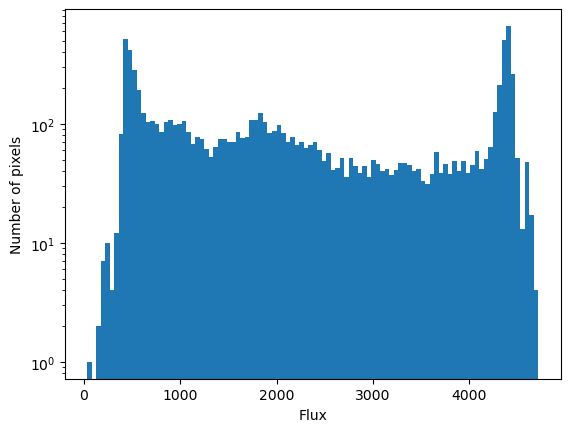

In [19]:
plt.hist(unfold(data_aligned).mean(1),100)
#plt.xlim([2000, 6300])
plt.yscale('log')
plt.ylabel('Number of pixels')
plt.xlabel('Flux')
#11920  MPI_210720187
#16280  MPI_210720199
#5315 MPI_210721013
#4807 #MPI_210723054#Ti L-edge few layered
#7684 MPI_210723063#O K-edge few layered
#???? MPI_210723063#O K-edge few layered high resolution images
#5200 MPI_210721013
#10208 MPI_210721020
#6260  MPI_210721021
#6031 MPI_210721099
#5654 MPI_210723059#Ti L-edge few layered high resolution images
#3039 MPI_210723077
#2230 MPI_210723082
#2082 MPI_210723123
#2402 MPI_210723193
#2041 MPI_210723085
#2119 MPI_210723123
#4330 MPI_210723146
#4059 MPI_210724051
#8919 MPI_210724077
#5731 MPI_210724089
#3220 MPI_210724095
#3587 MPI_210724100
#2673 MPI_210724105
#2058 MPI_210725000

Value 1 of the image signifies the background, meaning pixels with I>4400


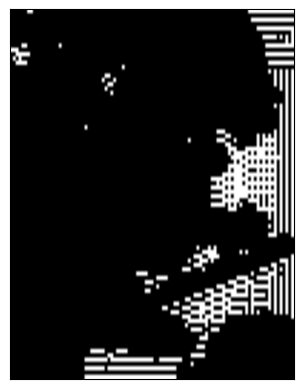

In [20]:
thresh=4400
print('Value 1 of the image signifies the background, meaning pixels with I>'+str(thresh))   
noscale(norm(data_aligned, thresh)[2].reshape(data_aligned.shape[0], data_aligned.shape[1]), resox, resoy, 'gray') 

In [21]:
data_trans_whitened = norm(data_aligned, thresh)[0]
print('Optical density image, averaged over the energies')
#scale(data_trans_whitened.mean(2),resoy,resox,'gray')

Optical density image, averaged over the energies


### $$\textbf{Transmission spectrum, averaged over the whole area}$$
<hr>

(528.0, 550.0)

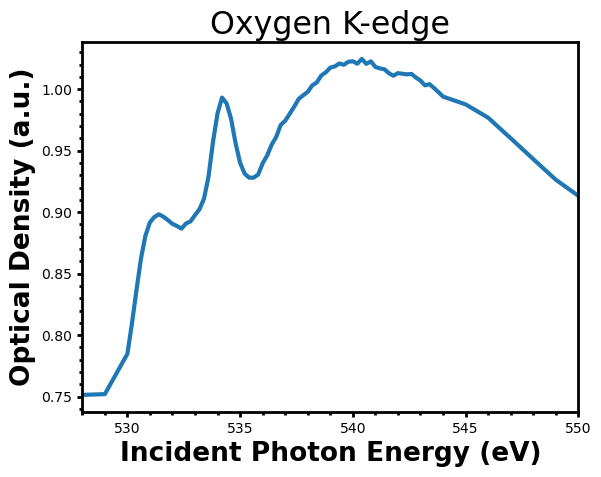

In [22]:
fig, ax2 = plt.subplots(1,1)
plt.plot(energy, (data_trans_whitened.reshape(data_trans_whitened.shape[0]* data_trans_whitened.shape[1], data_trans_whitened.shape[2]).mean(0)),linewidth=3)
plt.rcParams['font.size'] = '18'
plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
matplotlib.rcParams.update({'font.size': 19})
plt.ylabel('Optical Density (a.u.)',weight="bold", fontsize=19)
plt.title('Oxygen K-edge')
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(width=2,which='minor')
plt.xlim([528,550])
#plt.ylim([0.62,2.4])

### $$\textbf{t-SNE clustering}$$
<hr>

In [18]:
TSNE=sklearn.manifold.TSNE
tsne=TSNE(n_components=2, learning_rate='auto',init='random', perplexity=100) # specify amount of variance by float value, chooses nb of components accordingly 
H=tsne.fit_transform(unfold(data_trans_whitened[3:-3,3:-3,:]))
H_refold=H.reshape(data_trans_whitened[3:-3,3:-3,:].shape[0],data_trans_whitened[3:-3,3:-3,:].shape[1],-1)

In [ ]:
plt.imshow(H_refold[:,:,0],cmap='gray')

In [ ]:
plt.scatter(H[:,0],H[:,1], s=1)

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=1.4,min_samples=8,metric='euclidean').fit(H)
clustering.labels_

In [ ]:
plt.scatter(H[:,0],H[:,1], s=1)

In [ ]:
y_means = DBSCAN(eps=1.4,min_samples=8,metric='euclidean').fit_predict(H)
plt.scatter(H[y_means == 0, 0], H[y_means == 0, 1], s = 1, c = 'pink')
plt.scatter(H[y_means == 1, 0], H[y_means == 1, 1], s = 1, c = 'yellow')
plt.scatter(H[y_means == 2, 0], H[y_means == 2, 1], s = 1, c = 'cyan')
plt.scatter(H[y_means == 3, 0], H[y_means == 3, 1], s = 1, c = 'magenta')

In [ ]:
a=unfold(data_trans_whitened[3:-3,3:-3,:])

In [ ]:
plt.plot(energy,np.mean(a[y_means == 0,:], axis=0), c = '#b4d2b1')
plt.plot(energy,np.mean(a[y_means == 1,:], axis=0), c = '#568f8b')
plt.plot(energy,np.mean(a[y_means == 2,:], axis=0), c = '#1d4a60')
plt.plot(energy,np.mean(a[y_means == 3,:], axis=0), c = '#d15252')

In [ ]:
scale(a[:,1].reshape(data_trans_whitened[3:-3,3:-3,:].shape[0],data_trans_whitened[3:-3,3:-3,:].shape[1],-1),resox,resoy,'gray')

In [ ]:
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

In [ ]:
#you need to pass the indexing from the unfold to the folded

In [ ]:
data_trans_whitened.shape

In [ ]:
plt.imshow(data_trans_whitened[:,:,1])

### $$\textbf{Clustering}$$
<hr>

*  independent component analysis and gaussian mixture model, excluding a 3 pixels-border and including 1st PC component
*  Io for TEY calculated from clustering as described above for nb_clusters=10
*  increases the charge transport through the membrane
*  membrane with low electrically conductivity compared to the nanoparticle also charges

<img src='ms.png' width=450>

In [ ]:
from ipywidgets import Dropdown
dim = ['PCA', 'ICA', 'NMF']
dropdown = Dropdown(options=dim)
display(dropdown)

In [23]:
dim='ICA'

Clustered Image
Mean Spectrum of each cluster


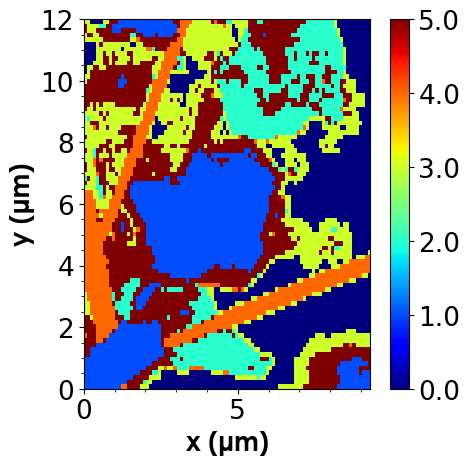

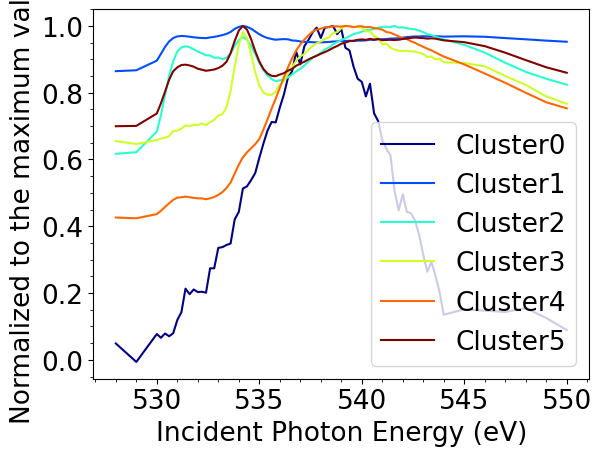

In [24]:
ans=clusteringopt(data_trans_whitened[3:-3,3:-3,:],6, False, energy, dim, 'gmm')

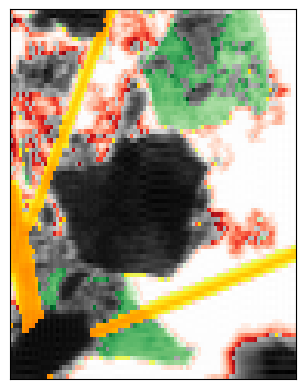

In [26]:
#cluster_per_pixelnew=ans[0]+1
data=data_trans_whitened[3:-3,3:-3,:]
noscale((-data.mean(2)), resox, resoy, 'gray')

#plt.imshow(cluster_per_pixelnew)
c1=np.where(cluster_per_pixelnew!=1, 0,cluster_per_pixelnew )
c2=np.where(cluster_per_pixelnew!=2, 0,cluster_per_pixelnew )
c3=np.where(cluster_per_pixelnew!=3, 0,cluster_per_pixelnew )
c4=np.where(cluster_per_pixelnew!=4, 0,cluster_per_pixelnew )
c5=np.where(cluster_per_pixelnew!=5, 0,cluster_per_pixelnew )
c6=np.where(cluster_per_pixelnew!=6, 0,cluster_per_pixelnew )
#plt.imshow(c1)
n1 = masked_array(c1*data.mean(2), c1*data.mean(2) == 0)
n2 = masked_array(c2*data.mean(2), c2*data.mean(2) == 0)
n3 = masked_array(c3*data.mean(2), c3*data.mean(2) == 0)
n4 = masked_array(c4*data.mean(2), c4*data.mean(2) == 0)
n5 = masked_array(c5*data.mean(2), c5*data.mean(2) == 0)
n6 = masked_array(c6*data.mean(2), c6*data.mean(2) == 0)
#scale(n1, resoy, resox,  'Blues')  

#exception=n2
#scale(n1, resox, resoy,  'gist_heat')
noscale(n3, resox, resoy,  'Greens')
#scale(n3, resox, resoy,  'Reds')
noscale(n4, resox, resoy,  'Reds') 
noscale(n5, resox, resoy,  'Wistia') 
#scale(n6, resox, resoy,  'Wistia')
#scale(exception, resoy, resox,  'Greens') 
#plt.title(u'T =650 \u00B0C (2h heating)')
#plt.title('Ti L-edge')

In [191]:
#fig, ax2 = plt.subplots(1,1)
#y1=-0.94+2.49*data.reshape(-1,data.shape[2])[ans[1][2]].mean(0)
#y2=data.reshape(-1,data.shape[2])[ans[1][4]].mean(0)
#y3=-2.03+8.29*data.reshape(-1,data.shape[2])[ans[1][3]].mean(0)
#plt.plot(energy,-0.94+2.49*data.reshape(-1,data.shape[2])[ans[1][2]].mean(0),linewidth=3.0,color='green',label='MXene')
#plt.plot(energy,data.reshape(-1,data.shape[2])[ans[1][4]].mean(0),linewidth=3.0,color='orange',label='Separator' )
#plt.plot(energy,-2.03+8.29*data.reshape(-1,data.shape[2])[ans[1][3]].mean(0),linewidth=3.0,color='red',label='Electrolyte residues' )
#plt.rcParams['font.size'] = '18'
#plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
#matplotlib.rcParams.update({'font.size': 19})
#plt.ylabel('Optical Density (a.u.)',weight="bold", fontsize=19)
#plt.minorticks_on()
#for axis in ['top','bottom','left','right']:
#        ax2.spines[axis].set_linewidth(2)
#        ax2.tick_params(width=2)
#plt.xlim([528,550])
#plt.ylim([0.62,2.4])
#plt.yticks([])
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

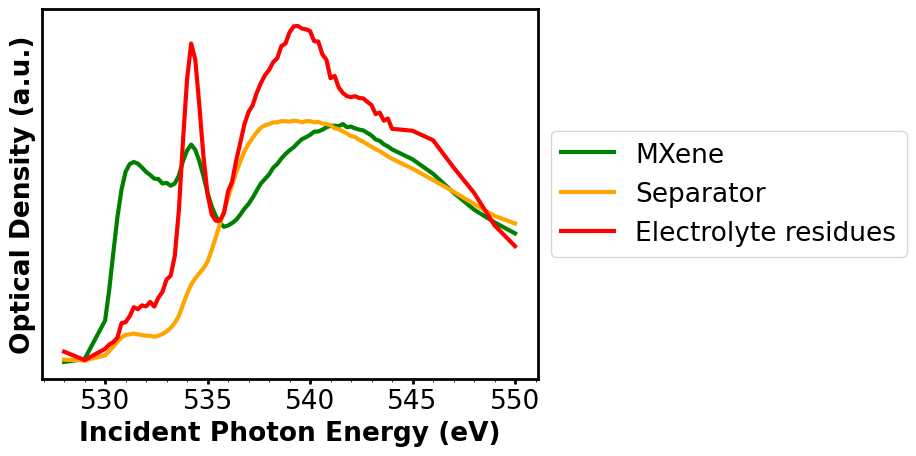

In [27]:
fig, ax2 = plt.subplots(1,1)
y1=-0.72+2.4*data.reshape(-1,data.shape[2])[ans[1][2]].mean(0)
y2=data.reshape(-1,data.shape[2])[ans[1][4]].mean(0)
y3=-1.5+9.9*data.reshape(-1,data.shape[2])[ans[1][3]].mean(0)
plt.plot(energy,-0.72+2.4*data.reshape(-1,data.shape[2])[ans[1][2]].mean(0),linewidth=3.0,color='green',label='MXene')
plt.plot(energy,data.reshape(-1,data.shape[2])[ans[1][4]].mean(0),linewidth=3.0,color='orange',label='Separator' )
plt.plot(energy,-1.5+9.9*data.reshape(-1,data.shape[2])[ans[1][3]].mean(0),linewidth=3.0,color='red',label='Electrolyte residues' )
plt.rcParams['font.size'] = '18'
plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
matplotlib.rcParams.update({'font.size': 19})
plt.ylabel('Optical Density (a.u.)',weight="bold", fontsize=19)
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
#plt.xlim([528,550])
#plt.ylim([0.62,2.4])
plt.yticks([])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [372]:
#import h5py
#file_name = "data_2.h5"
# Open the HDF file in write mode
#with h5py.File(file_name, "w") as f:
    # Create datasets and save arrays
#    f.create_dataset("energy", data=energy)
#    f.create_dataset("trans_cycled_mxene", data=y1)
#    f.create_dataset("trans_separator", data=y2)
#    f.create_dataset("trans_electrolyte", data=y3)

#    f.create_dataset("tey_pure_electrolyte", data=W[:,0])
#    f.create_dataset("tey_mxene", data=y_tey_mxene)
#    f.create_dataset("tey_electrolyte", data=y_tey_electrolyte)

#    f.create_dataset("energy_pr_transok", data=energy_pr_transok)
#    f.create_dataset("trans_pristine_mxene", data=y_transok)

#f.close()

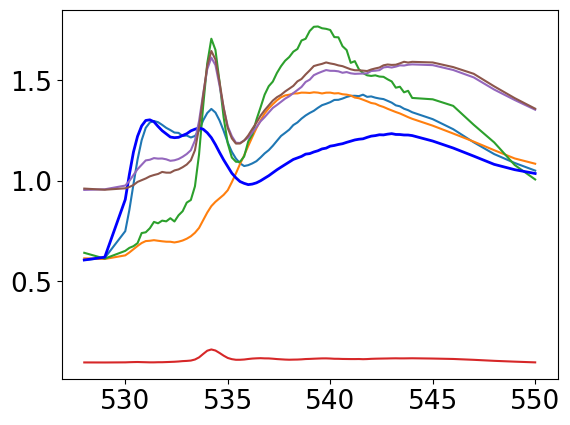

In [28]:
f=h5py.File('data_2.h5','r')

energy=f['energy'][...]
d1=f['trans_cycled_mxene'][...]
d2=f['trans_separator'][...]
d3=f['trans_electrolyte'][...]
d4=f['tey_pure_electrolyte'][...]
data_pr_transok=f['trans_pristine_mxene'][...]

energy_pr_transok=f['energy_pr_transok'][...]
d5=f['trans_pristine_mxene'][...]

d6=f['tey_mxene'][...]
d7=f['tey_electrolyte'][...]

plt.plot(energy,d1)
plt.plot(energy,d2)
plt.plot(energy,d3)
plt.plot(energy,d4)

#plt.plot(energy_pr_transok,-1.07+1.2*data_pr_transok,linewidth=2.0,color='blue',label='MXene')
plt.plot(energy_pr_transok,data_pr_transok,linewidth=2.0,color='blue',label='MXene')

plt.plot(energy,d6)
plt.plot(energy,d7)
f.close()

([], [])

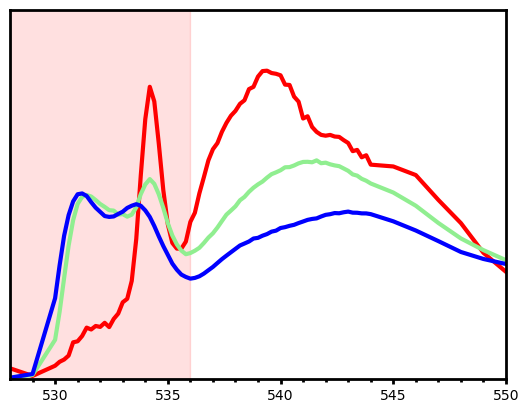

In [4]:
fig, ax2 = plt.subplots(1,1)
plt.plot(energy,d3,linewidth=3.0,color='red' )
plt.plot(energy,d1,linewidth=3.0,color='lightgreen')
plt.plot(energy_pr_transok,data_pr_transok,linewidth=3.0,color='blue')

plt.rcParams['font.size'] = '18'
matplotlib.rcParams.update({'font.size': 19})
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
plt.axvspan(528, 536, color='red', alpha=0.12)
plt.xlim(528,550)
plt.ylim(0.6,2)
plt.yticks([])

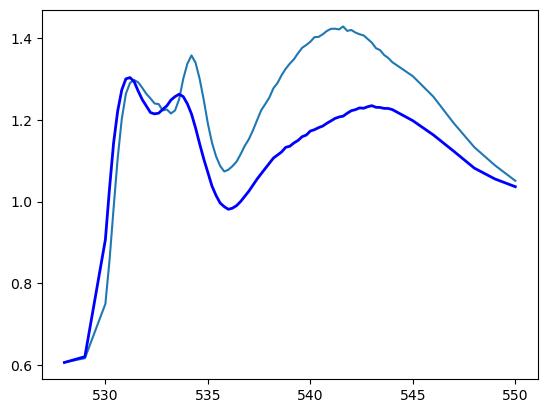

In [13]:
plt.plot(energy,d1)
plt.plot(energy_pr_transok,data_pr_transok,linewidth=2.0,color='blue',label='MXene')

In [25]:
d1.shape,d5.shape,d7.shape

((79,), (78,), (79,))

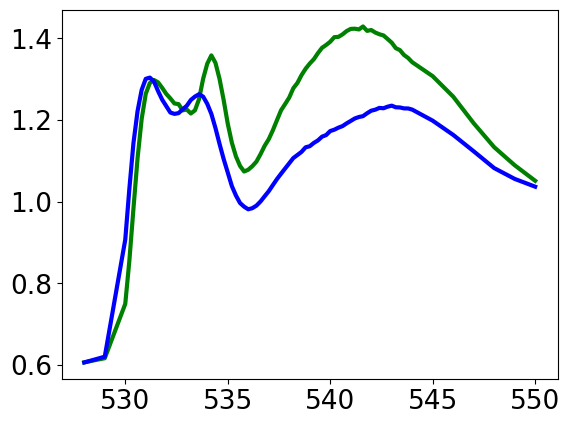

In [29]:
f=h5py.File('PristineOKedgeTransmission.hdf','r')
energy_pr_transok=f['energy_pr'][...]
data_pr_transok=f['data_prp'][...]
plt.plot(energy,d1,linewidth=3.0,color='green',label='MXene')
plt.plot(energy_pr_transok,-1.07+1.2*data_pr_transok,linewidth=3.0,color='blue',label='MXene')
y_transok=-1.07+1.2*data_pr_transok
f.close()

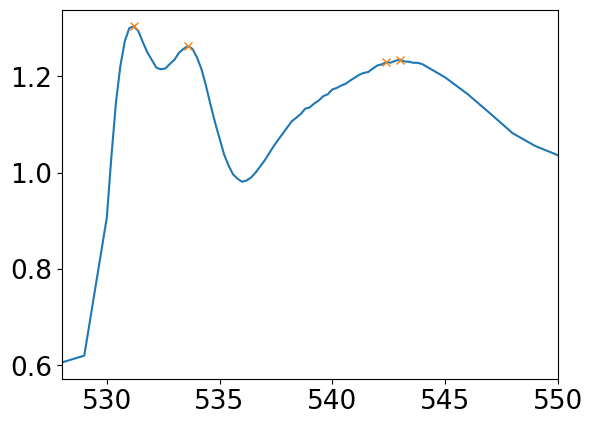

array([531.2, 533.6, 542.4, 543. ])

In [30]:
from scipy.signal import find_peaks
x=y_transok
energy=energy_pr_transok
peaks, _ = find_peaks(x, height=0)
plt.plot(energy,x)
plt.plot(energy[peaks],x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlim([528,550])
plt.show()
energy[peaks]

# $$\textbf{Curve fitting analysis in NEXAFS}$$

The quantitative analysis of N E X A F S data requires a curve fitting of the near-edge features, which
is typically achieved by a nonlinear least-squares fitting of the experimental data

Different curve fitting functions are used for features at three energy regions with respect
to the ionization potential: (1) the bound states at energies below IP, (2) a step-like feature at E = IP,
and (3) the σ* resonance located at the c o n t i n u u m states at energies above IP.

 the step-like feature at E = IP is related to the excitation of core electrons to the
c o n t i n u u m or quasi-continuum states. One of the most c o m m o n l y used function for the continuum
step is the error function (erf)

$$\textbf{TEY MXene}$$

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 1.07 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with six peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma,
                    gauss6_amplitude, gauss6_center, gauss6_sigma):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma))+
            np.abs(gaussian_peak(x, gauss6_amplitude, gauss6_center, gauss6_sigma))  )

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma,
                 gauss6_amplitude, gauss6_center, gauss6_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma,
                               gauss6_amplitude=gauss6_amplitude, gauss6_center=gauss6_center, gauss6_sigma=gauss6_sigma
                               )

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = d6

# Initial guess for parameters
initial_step_height = 0.25#0.3
initial_step_center = 534.3#534.3
initial_step_width = 1
initial_linear_slope = 0.006

initial_gauss1_amplitude = 0.1
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1

initial_gauss2_amplitude = 0.05
initial_gauss2_center = 533.6
initial_gauss2_sigma = 0.6

initial_gauss3_amplitude = 0.2
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1

initial_gauss4_amplitude = 0.25
initial_gauss4_center = 536.6
initial_gauss4_sigma = 1

initial_gauss5_amplitude = 0.35
initial_gauss5_center = 539.8
initial_gauss5_sigma = 1

initial_gauss6_amplitude = 0.6
initial_gauss6_center = 544
initial_gauss6_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma,
                      initial_gauss6_amplitude, initial_gauss6_center, initial_gauss6_sigma
                      )

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='brown')
plt.legend()
plt.axvline(533.2)
plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


ValueError: operands could not be broadcast together with shapes (78,) (79,) 

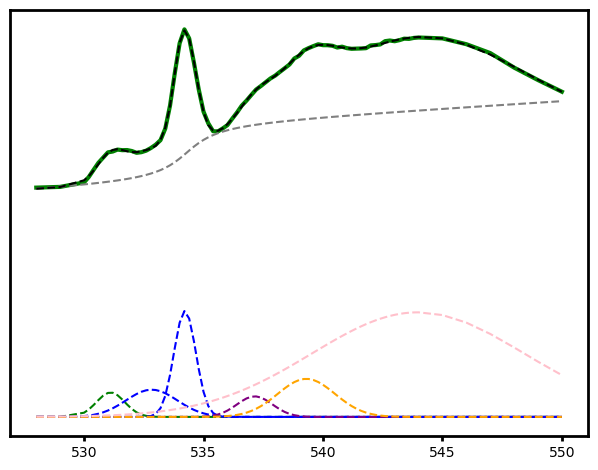

In [4]:
fig, ax2 = plt.subplots(1,1)
intensity=d6
plt.plot(energy, intensity, label='Original Spectrum',color='green',linewidth=3)
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
#plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='pink')

#plt.legend()


plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 1.07 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with six peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma)) )

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma
                               )

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = d6

# Initial guess for parameters
initial_step_height = 0.25#0.3
initial_step_center = 534.3#534.3
initial_step_width = 1
initial_linear_slope = 0.006

initial_gauss1_amplitude = 0.1
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1

initial_gauss2_amplitude = 0.2
initial_gauss2_center = 534.2
initial_gauss2_sigma = 1

initial_gauss3_amplitude = 0.25
initial_gauss3_center = 536.6
initial_gauss3_sigma = 1

initial_gauss4_amplitude = 0.35
initial_gauss4_center = 539.8
initial_gauss4_sigma = 1

initial_gauss5_amplitude = 0.6
initial_gauss5_center = 544
initial_gauss5_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma
                      )

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')

plt.legend()
plt.axvline(533.2)
plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


ValueError: operands could not be broadcast together with shapes (78,) (79,) 

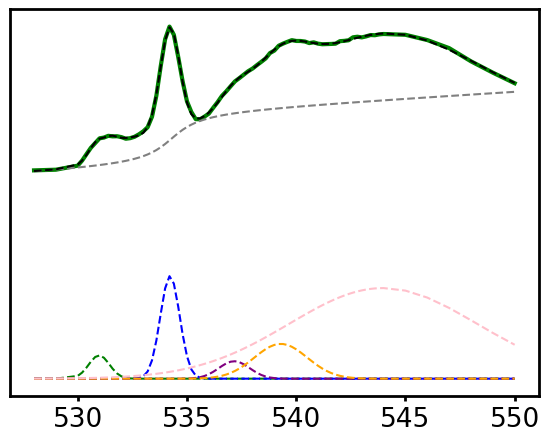

In [37]:
fig, ax2 = plt.subplots(1,1)
intensity=d6
plt.plot(energy, intensity, label='Original Spectrum',color='green',linewidth=3)
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
#plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='pink')

#plt.legend()


plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters

$$\textbf{TEY electrolyte}$$

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 1.07 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with six peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma)) )

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma
                               )

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = d7

# Initial guess for parameters
initial_step_height = 0.25#0.3
initial_step_center = 534.3#534.3
initial_step_width = 1
initial_linear_slope = 0.006

initial_gauss1_amplitude = 0.1
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1

initial_gauss2_amplitude = 0.2
initial_gauss2_center = 534.2
initial_gauss2_sigma = 1

initial_gauss3_amplitude = 0.25
initial_gauss3_center = 536.6
initial_gauss3_sigma = 1

initial_gauss4_amplitude = 0.35
initial_gauss4_center = 539.8
initial_gauss4_sigma = 1

initial_gauss5_amplitude = 0.6
initial_gauss5_center = 544
initial_gauss5_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma
                      )

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')

plt.legend()
plt.axvline(533.2)
plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


ValueError: operands could not be broadcast together with shapes (78,) (79,) 

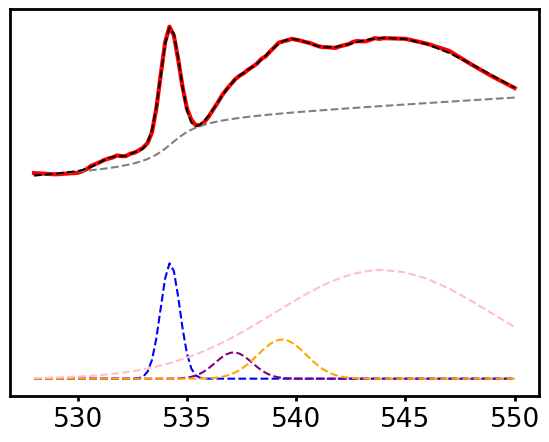

In [448]:
fig, ax2 = plt.subplots(1,1)
intensity=d7
plt.plot(energy, intensity, label='Original Spectrum',color='red',linewidth=3)
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
#plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
#plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
#         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
#         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='pink')

#plt.legend()


plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)

$$\textbf{TEY electrolyte_1st component}$$

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width):
    return 0.095+step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with six peaks
def composite_model(x, step_height, step_center, step_width,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma,
                    gauss6_amplitude, gauss6_center, gauss6_sigma):
    return (arctangent_step(x, step_height, step_center, step_width) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma)) +
            np.abs(gaussian_peak(x, gauss6_amplitude, gauss6_center, gauss6_sigma)))

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma,
                 gauss6_amplitude, gauss6_center, gauss6_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma,
                               gauss6_amplitude=gauss6_amplitude, gauss6_center=gauss6_center, gauss6_sigma=gauss6_sigma)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = y4

# Initial guess for parameters
initial_step_height = 0.005#0.01
initial_step_center = 534.9#535
initial_step_width = 1.9#1

initial_gauss1_amplitude = 0.1
initial_gauss1_center = 530.6
initial_gauss1_sigma = 1
initial_gauss2_amplitude = 0.2
initial_gauss2_center = 531.4
initial_gauss2_sigma = 1
initial_gauss3_amplitude = 0.4
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1
initial_gauss4_amplitude = 0.25
initial_gauss4_center = 536.6
initial_gauss4_sigma = 1
initial_gauss5_amplitude = 0.35
initial_gauss5_center = 539.8
initial_gauss5_sigma = 1
initial_gauss6_amplitude = 0.3
initial_gauss6_center = 544
initial_gauss6_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma,
                      initial_gauss6_amplitude, initial_gauss6_center, initial_gauss6_sigma)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='pink')
plt.legend()
plt.axvline(532.4)
plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())

NameError: name 'y4' is not defined

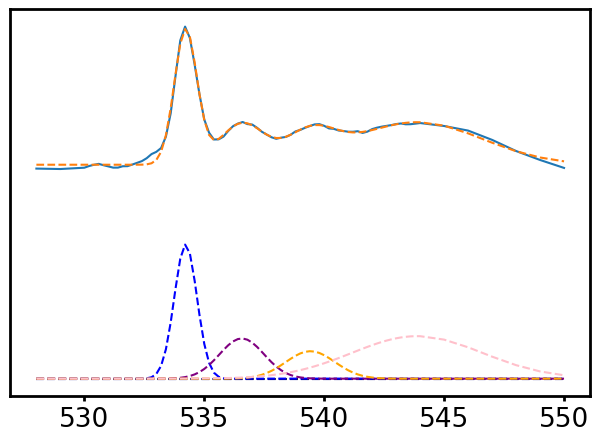

In [226]:
fig, ax2 = plt.subplots(1,1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
#plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width),
         #label='Initial Arctangent', linestyle='--', color='red')
    
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='black')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='pink')
#plt.legend()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
#plt.axvline(531.4,color='gray',linestyle='dotted')
plt.yticks([])
plt.tight_layout()
plt.show()

$$\textbf{Transmission cycled MXene}$$

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 0.7 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with four peaks
# Combine arctangent and Gaussian functions into a composite model with four peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                    gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                    gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                    gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_width * gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_width * gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_width * gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_width * gauss4_sigma)))


# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                 gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                 gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                 gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center,
                               gauss1_sigma=gauss1_sigma, gauss1_width=gauss1_width,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center,
                               gauss2_sigma=gauss2_sigma, gauss2_width=gauss2_width,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center,
                               gauss3_sigma=gauss3_sigma, gauss3_width=gauss3_width,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center,
                               gauss4_sigma=gauss4_sigma, gauss4_width=gauss4_width)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = d1

# Initial guess for parameters
initial_step_height = 0.3
initial_step_center = 534.3
initial_step_width = 1
initial_linear_slope = 0.005

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1
initial_gauss1_width = 1  # Adjust this parameter to control the width of the first peak

initial_gauss2_amplitude = 0.4
initial_gauss2_center = 534.2
initial_gauss2_sigma = 1
initial_gauss2_width = 1  # Adjust this parameter to control the width of the second peak

initial_gauss3_amplitude = 0.35
initial_gauss3_center = 539.8
initial_gauss3_sigma = 1
initial_gauss3_width = 1  # Adjust this parameter to control the width of the third peak

initial_gauss4_amplitude = 0.29#0.25
initial_gauss4_center = 542.5
initial_gauss4_sigma = 1
initial_gauss4_width = 1  # Adjust this parameter to control the width of the fourth peak

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma, initial_gauss1_width,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma, initial_gauss2_width,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma, initial_gauss3_width,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma, initial_gauss4_width)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_width'].value * result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_width'].value * result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_width'].value * result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_width'].value * result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


ValueError: operands could not be broadcast together with shapes (78,) (79,) 

NameError: name 'y1' is not defined

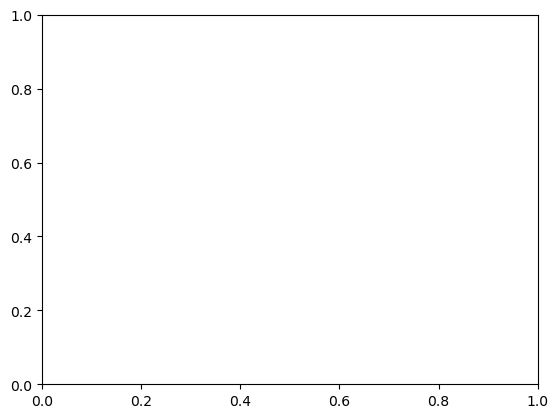

In [9]:
fig, ax2 = plt.subplots(1,1)
intensity = y1
plt.plot(energy, intensity, label='Pristine Ti3C2Tx MXene',color='lightgreen')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
#plt.legend()
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='brown')

plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters
print(result.fit_report())

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 0.7 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with four peaks
# Combine arctangent and Gaussian functions into a composite model with four peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                    gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                    gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                    gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width,
                    gauss5_amplitude, gauss5_center, gauss5_sigma, gauss5_width):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_width * gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_width * gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_width * gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_width * gauss4_sigma))+
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_width * gauss5_sigma)))


# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                 gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                 gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                 gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width,
                 gauss5_amplitude, gauss5_center, gauss5_sigma, gauss5_width):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center,
                               gauss1_sigma=gauss1_sigma, gauss1_width=gauss1_width,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center,
                               gauss2_sigma=gauss2_sigma, gauss2_width=gauss2_width,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center,
                               gauss3_sigma=gauss3_sigma, gauss3_width=gauss3_width,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center,
                               gauss4_sigma=gauss4_sigma, gauss4_width=gauss4_width,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center,
                               gauss5_sigma=gauss5_sigma, gauss5_width=gauss5_width)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data
energy = energy
intensity = y1

# Initial guess for parameters
initial_step_height = 0.3
initial_step_center = 534.3
initial_step_width = 1
initial_linear_slope = 0.005

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1
initial_gauss1_width = 1  # Adjust this parameter to control the width of the first peak

initial_gauss2_amplitude = 0.1
initial_gauss2_center = 533.6
initial_gauss2_sigma = 1
initial_gauss2_width = 1  # Adjust this parameter to control the width of the 2nd peak

initial_gauss3_amplitude = 0.4
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1
initial_gauss3_width = 1  # Adjust this parameter to control the width of the 3rdpeak

initial_gauss4_amplitude = 0.35
initial_gauss4_center = 539.8
initial_gauss4_sigma = 1
initial_gauss4_width = 1  # Adjust this parameter to control the width of the 4th peak

initial_gauss5_amplitude = 0.29#0.25
initial_gauss5_center = 542.5
initial_gauss5_sigma = 1
initial_gauss5_width = 1  # Adjust this parameter to control the width of the 5th peak

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma, initial_gauss1_width,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma, initial_gauss2_width,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma, initial_gauss3_width,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma, initial_gauss4_width,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma, initial_gauss5_width)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_width'].value * result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_width'].value * result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_width'].value * result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_width'].value * result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_width'].value * result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='orange')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


NameError: name 'y1' is not defined

NameError: name 'y1' is not defined

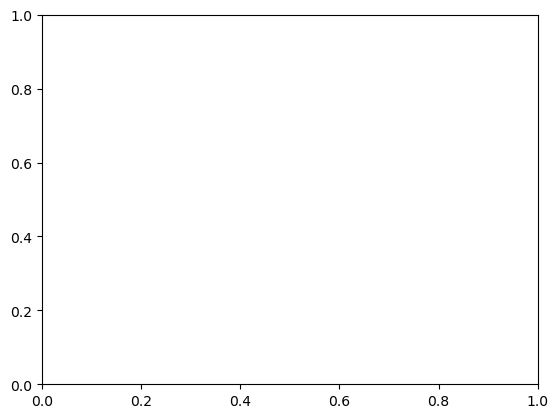

In [11]:
fig, ax2 = plt.subplots(1,1)
energy=energy
intensity = y1
plt.plot(energy, intensity, label='Cycled Ti3C2Tx MXene',color='lightgreen')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
#plt.legend()
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='cyan')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')

plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters
print(result.fit_report())

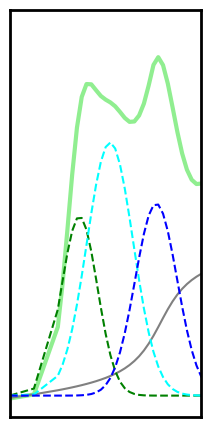

In [50]:
fig, ax2 = plt.subplots(1, 1, figsize=(3, 5))
energy=energy
intensity = y1
#plt.plot(energy, intensity, label='Cycled Ti3C2Tx MXene',color='lightgreen')
plt.plot(energy, result.best_fit, label='Fit',linewidth=3, color='lightgreen')
#plt.legend()
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent',  color='gray')
plt.plot(energy, 0.61+np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, 0.61+np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='cyan')
plt.plot(energy, 0.61+np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.xlim(528,536)
plt.tight_layout()
plt.yticks([])
plt.xticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)

In [1]:
fig, ax2 = plt.subplots(1, 1, figsize=(3, 5))
plt.plot(f1, f3, label='Fit',linewidth=3, color='lightgreen')

plt.plot(f1, f4,
         label='Fitted Gaussian 1', color='gray')
plt.plot(f1, f5,
         label='Fitted Gaussian 2', linestyle='--', color='green')
plt.plot(f1, f6,
         label='Fitted Gaussian 3', linestyle='--', color='cyan')
plt.plot(f1, f7,
         label='Fitted Gaussian 4', linestyle='--', color='blue')


plt.plot(f11, 0.848+f13,
         label='Fit',linewidth=3,  color='blue')
plt.plot(f11, 0.88+f14,
         label='Initial Arctangent', color='gray')
plt.plot(f11, 0.88+f15,
         label='Fitted Gaussian 2', linestyle='--', color='green')
plt.plot(f11, 0.88+f16,
         label='Fitted Gaussian 3', linestyle='--', color='blue')

#plt.axvspan(528,536, color='red', alpha=0.12)
plt.ylim(0.56,2.3)
plt.xlim(528,536)
plt.tight_layout()
plt.yticks([])
plt.xticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)

NameError: name 'plt' is not defined

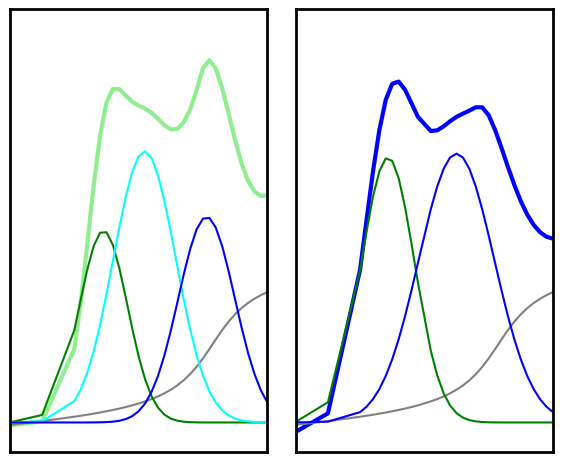

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming f1, f3, f4, f5, f6, f7, f11, f13, f14, f15, f16 are defined somewhere above this
# For demonstration, let's create some dummy data


# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5), sharey=True)  # Share Y axis

# Plot on the first subplot
ax1.plot(f1, f3, label='Fit', linewidth=3, color='lightgreen')
ax1.plot(f1, f4, label='Fitted Gaussian 1', color='gray')
ax1.plot(f1, f5, label='Fitted Gaussian 2',  color='green')
ax1.plot(f1, f6, label='Fitted Gaussian 3',  color='cyan')
ax1.plot(f1, f7, label='Fitted Gaussian 4',  color='blue')

# Plot on the second subplot
ax2.plot(f11, f13, label='Fit', linewidth=3, color='blue')
ax2.plot(f11, f14, label='Initial Arctangent', color='gray')
ax2.plot(f11, f15, label='Fitted Gaussian 2', color='green')
ax2.plot(f11, f16, label='Fitted Gaussian 3',  color='blue')

# Set limits and layout
for ax in (ax1, ax2):
    ax.set_xlim(528, 536)
    ax.set_yticks([])
    ax.set_xticks([])
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)
        ax.tick_params(width=2)
        ax.tick_params(which='minor', width=2)

plt.tight_layout()
plt.show()


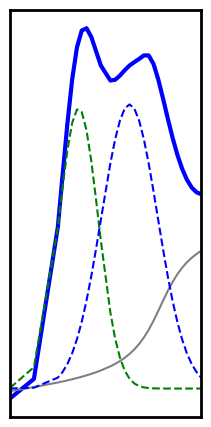

In [70]:
fig, ax2 = plt.subplots(1, 1, figsize=(3, 5))
plt.plot(f11, f13,
         label='Fit',linewidth=3,  color='blue')
plt.plot(f11, f14,
         label='Initial Arctangent', color='gray')
plt.plot(f11, f15,
         label='Fitted Gaussian 2', linestyle='--', color='green')
plt.plot(f11, f16,
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.xlim(528,536)
plt.tight_layout()
plt.yticks([])
plt.xticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)

$$\textbf{Transmission pristine MXene}$$

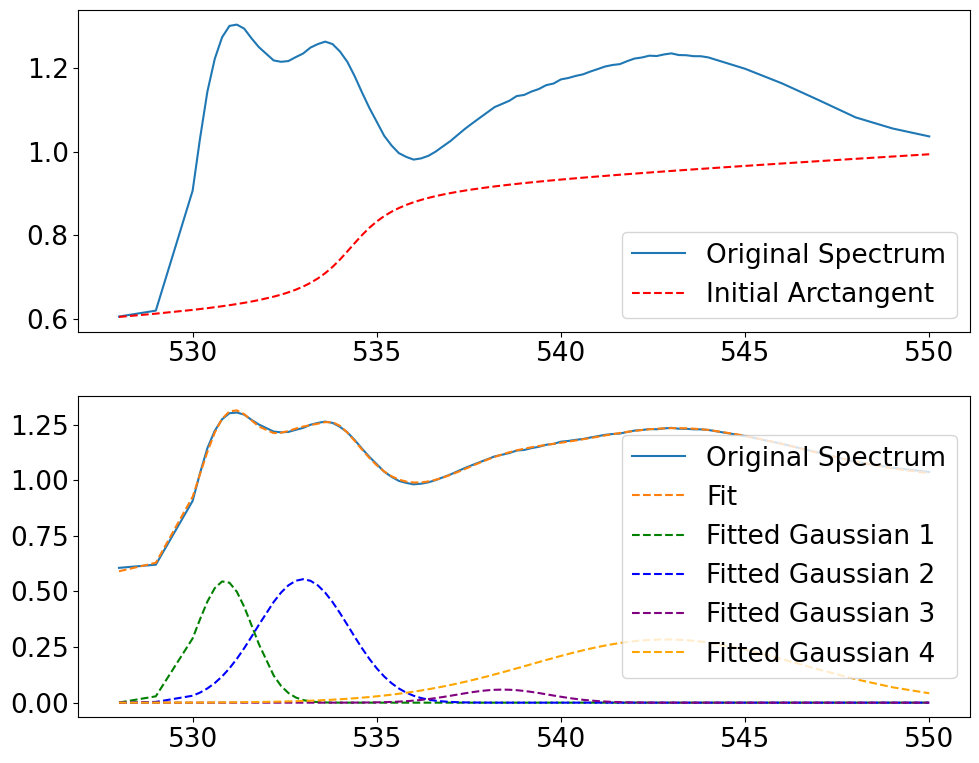

[[Model]]
    Model(composite_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 523
    # data points      = 78
    # variables        = 20
    chi-square         = 0.00202628
    reduced chi-square = 3.4936e-05
    Akaike info crit   = -783.544345
    Bayesian info crit = -736.410168
    R-squared          = 0.99835179
[[Variables]]
    step_height:       0.29152554 +/- 0.01545028 (5.30%) (init = 0.3)
    step_center:       533.621739 +/- 0.05829618 (0.01%) (init = 534.3)
    step_width:        0.44274854 +/- 0.05231185 (11.82%) (init = 1)
    linear_slope:      0.00533958 +/- 3.4141e-04 (6.39%) (init = 0.005)
    gauss1_amplitude:  0.54704542 +/- 0.01947231 (3.56%) (init = 0.2)
    gauss1_center:     530.868585 +/- 0.01973647 (0.00%) (init = 531.4)
    gauss1_sigma:      0.82343343 +/- 2.5599e+08 (31088512637.23%) (init = 1)
    gauss1_width:      0.93351375 +/- 2.9022e+08 (31088512637.72%) (init = 1)
    gauss2_amplitude:  0.55491229 +/- 0.00805866 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 0.7 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with four peaks
# Combine arctangent and Gaussian functions into a composite model with four peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                    gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                    gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                    gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_width * gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_width * gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_width * gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_width * gauss4_sigma)))


# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma, gauss1_width,
                 gauss2_amplitude, gauss2_center, gauss2_sigma, gauss2_width,
                 gauss3_amplitude, gauss3_center, gauss3_sigma, gauss3_width,
                 gauss4_amplitude, gauss4_center, gauss4_sigma, gauss4_width):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center,
                               gauss1_sigma=gauss1_sigma, gauss1_width=gauss1_width,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center,
                               gauss2_sigma=gauss2_sigma, gauss2_width=gauss2_width,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center,
                               gauss3_sigma=gauss3_sigma, gauss3_width=gauss3_width,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center,
                               gauss4_sigma=gauss4_sigma, gauss4_width=gauss4_width)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data
energy=energy_pr_transok
intensity = y_transok

# Initial guess for parameters
initial_step_height = 0.3
initial_step_center = 534.3
initial_step_width = 1
initial_linear_slope = 0.005

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1
initial_gauss1_width = 1  # Adjust this parameter to control the width of the first peak

initial_gauss2_amplitude = 0.4
initial_gauss2_center = 533.6#534.2
initial_gauss2_sigma = 1
initial_gauss2_width = 1  # Adjust this parameter to control the width of the second peak

initial_gauss3_amplitude = 0.35
initial_gauss3_center = 539.8
initial_gauss3_sigma = 1
initial_gauss3_width = 1  # Adjust this parameter to control the width of the third peak

initial_gauss4_amplitude = 0.29#0.25
initial_gauss4_center = 542.5
initial_gauss4_sigma = 1
initial_gauss4_width = 1  # Adjust this parameter to control the width of the fourth peak

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma, initial_gauss1_width,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma, initial_gauss2_width,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma, initial_gauss3_width,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma, initial_gauss4_width)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_width'].value * result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_width'].value * result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_width'].value * result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_width'].value * result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


[[Model]]
    Model(composite_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 523
    # data points      = 78
    # variables        = 20
    chi-square         = 0.00202628
    reduced chi-square = 3.4936e-05
    Akaike info crit   = -783.544345
    Bayesian info crit = -736.410168
    R-squared          = 0.99835179
[[Variables]]
    step_height:       0.29152554 +/- 0.01545028 (5.30%) (init = 0.3)
    step_center:       533.621739 +/- 0.05829618 (0.01%) (init = 534.3)
    step_width:        0.44274854 +/- 0.05231185 (11.82%) (init = 1)
    linear_slope:      0.00533958 +/- 3.4141e-04 (6.39%) (init = 0.005)
    gauss1_amplitude:  0.54704542 +/- 0.01947231 (3.56%) (init = 0.2)
    gauss1_center:     530.868585 +/- 0.01973647 (0.00%) (init = 531.4)
    gauss1_sigma:      0.82343343 +/- 2.5599e+08 (31088512637.23%) (init = 1)
    gauss1_width:      0.93351375 +/- 2.9022e+08 (31088512637.72%) (init = 1)
    gauss2_amplitude:  0.55491229 +/- 0.00805866 

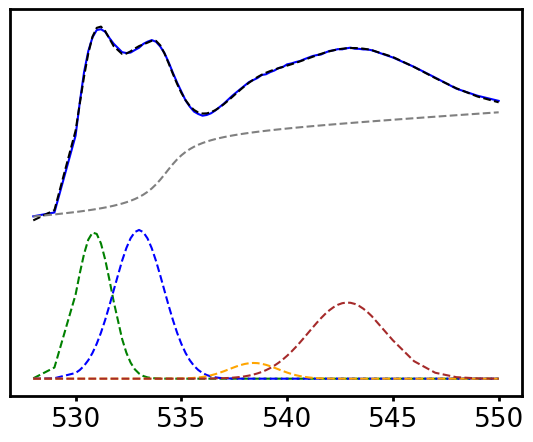

In [37]:
fig, ax2 = plt.subplots(1,1)
energy=energy_pr_transok
intensity = y_transok
plt.plot(energy, intensity, label='Pristine Ti3C2Tx MXene',color='blue')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
#plt.legend()
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='brown')

plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters
print(result.fit_report())

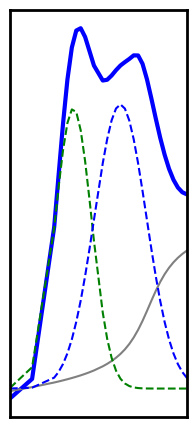

In [38]:
fig, ax2 = plt.subplots(1, 1, figsize=(3, 5))
energy=energy_pr_transok
intensity = y_transok
plt.plot(energy, result.best_fit, label='Fit',linewidth=3, color='blue')
#plt.legend()
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', color='gray')
plt.plot(energy, 0.61+np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, 0.61+np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')

plt.tight_layout()
plt.yticks([])
plt.xticks([])
plt.xlim(528,536)
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)


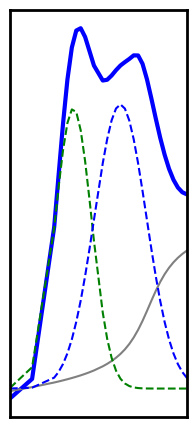

In [39]:
fig, ax2 = plt.subplots(1, 1, figsize=(3, 5))

f11=energy_pr_transok
f12=y_transok
f13=result.best_fit
f14=arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope)
f15=0.61+np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value))
f16=0.61+np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value))

plt.plot(f11, f13, label='Fit',linewidth=3, color='blue')
#plt.legend()
plt.plot(f11, f14,
         label='Initial Arctangent', color='gray')
plt.plot(f11, f15,
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(f11, f16,
         label='Fitted Gaussian 2', linestyle='--', color='blue')

plt.tight_layout()
plt.yticks([])
plt.xticks([])
plt.xlim(528,536)
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)

$$\textbf{Transmission electrolyte}$$

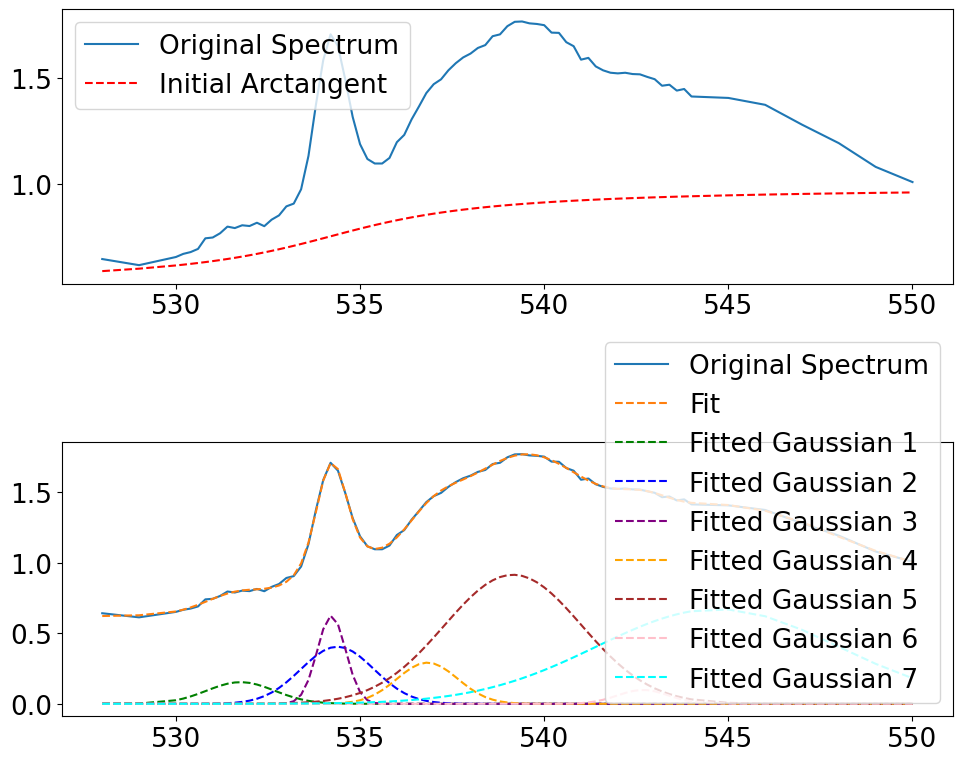

[[Model]]
    Model(composite_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17273
    # data points      = 79
    # variables        = 24
    chi-square         = 0.00736338
    reduced chi-square = 1.3388e-04
    Akaike info crit   = -685.174027
    Bayesian info crit = -628.307279
    R-squared          = 0.99927257
[[Variables]]
    step_height:       21.1799981 +/- 165406.992 (780958.48%) (init = 0.479)
    step_center:       562.161301 +/- 209.434450 (37.26%) (init = 534.2)
    step_width:        0.56762884 +/- 4439.96416 (782194.95%) (init = 3.29)
    gauss1_amplitude:  0.15336501 +/- 0.04444799 (28.98%) (init = 0.2)
    gauss1_center:     531.756930 +/- 0.22295015 (0.04%) (init = 531.4)
    gauss1_sigma:      0.92341548 +/- 0.18601418 (20.14%) (init = 1)
    gauss2_amplitude:  0.40452272 +/- 0.10878460 (26.89%) (init = 0.3)
    gauss2_center:     534.385867 +/- 0.09121657 (0.02%) (init = 532.8)
    gauss2_sigma:      0.99119959 +/- 0.2431375

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width):
    return 0.51+step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with seven peaks
def composite_model(x, step_height, step_center, step_width,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma,
                    gauss6_amplitude, gauss6_center, gauss6_sigma,
                    gauss7_amplitude, gauss7_center, gauss7_sigma):
    return (arctangent_step(x, step_height, step_center, step_width) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma)) +
            np.abs(gaussian_peak(x, gauss6_amplitude, gauss6_center, gauss6_sigma)) +
            np.abs(gaussian_peak(x, gauss7_amplitude, gauss7_center, gauss7_sigma)))

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma,
                 gauss6_amplitude, gauss6_center, gauss6_sigma,
                 gauss7_amplitude, gauss7_center, gauss7_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma,
                               gauss6_amplitude=gauss6_amplitude, gauss6_center=gauss6_center, gauss6_sigma=gauss6_sigma,
                               gauss7_amplitude=gauss7_amplitude, gauss7_center=gauss7_center, gauss7_sigma=gauss7_sigma)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = y3

# Initial guess for parameters
initial_step_height = 0.479#0.479
initial_step_center = 534.2#536.33
initial_step_width = 3.29#2.7#2.3

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4#531.4
initial_gauss1_sigma = 1
initial_gauss2_amplitude = 0.3
initial_gauss2_center = 532.8
initial_gauss2_sigma = 1
initial_gauss3_amplitude = 0.4
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1
initial_gauss4_amplitude = 0.25
initial_gauss4_center = 536.6
initial_gauss4_sigma = 1
initial_gauss5_amplitude = 0.35
initial_gauss5_center = 539.8
initial_gauss5_sigma = 1
initial_gauss6_amplitude = 0.25
initial_gauss6_center = 542.5
initial_gauss6_sigma = 1
initial_gauss7_amplitude = 0.3
initial_gauss7_center = 544
initial_gauss7_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma,
                      initial_gauss6_amplitude, initial_gauss6_center, initial_gauss6_sigma,
                      initial_gauss7_amplitude, initial_gauss7_center, initial_gauss7_sigma)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='pink')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss7_amplitude'].value,
         result.params['gauss7_center'].value, result.params['gauss7_sigma'].value)),
         label='Fitted Gaussian 7', linestyle='--', color='cyan')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


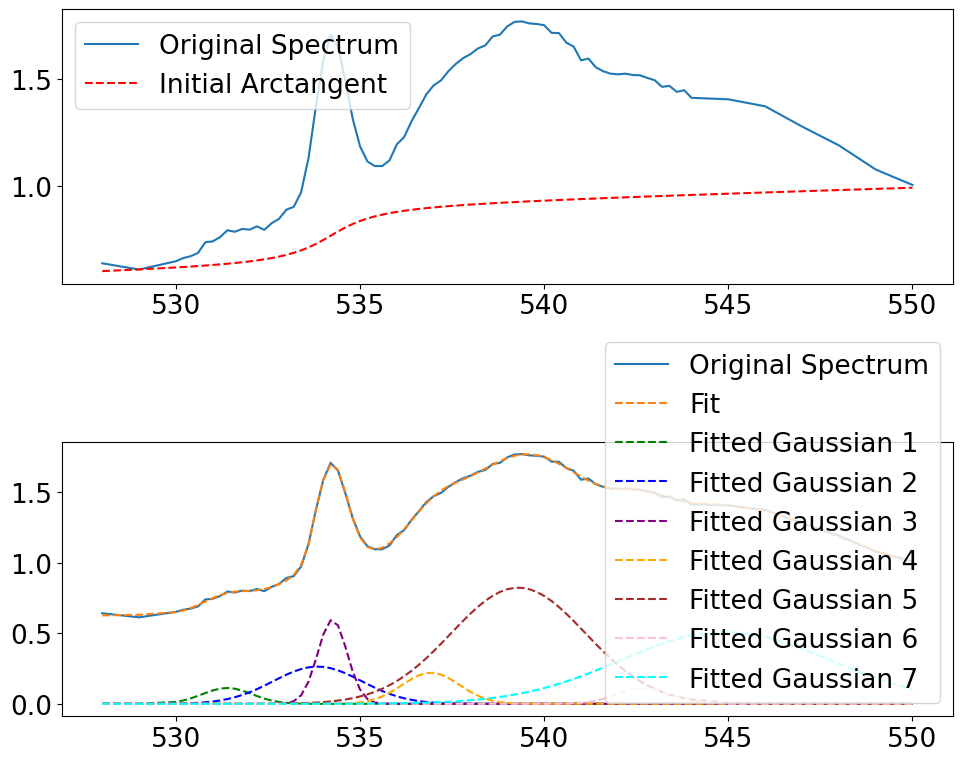

[[Model]]
    Model(composite_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 715
    # data points      = 79
    # variables        = 25
    chi-square         = 0.00591828
    reduced chi-square = 1.0960e-04
    Akaike info crit   = -700.433464
    Bayesian info crit = -641.197267
    R-squared          = 0.99941533
[[Variables]]
    step_height:       0.20664862 +/- 0.05435818 (26.30%) (init = 0.3)
    step_center:       533.707500 +/- 0.06641442 (0.01%) (init = 534.21)
    step_width:        0.13789354 +/- 0.05026059 (36.45%) (init = 1)
    linear_slope:      0.00341348 +/- 3.3006e-04 (9.67%) (init = 0.005)
    gauss1_amplitude:  0.11209469 +/- 0.03256425 (29.05%) (init = 0.2)
    gauss1_center:     531.393512 +/- 0.15346173 (0.03%) (init = 531.4)
    gauss1_sigma:      0.67614223 +/- 0.11633044 (17.21%) (init = 1)
    gauss2_amplitude:  0.26370760 +/- 0.04580565 (17.37%) (init = 0.3)
    gauss2_center:     533.844547 +/- 0.20764582 (0.04%) (init

In [487]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import Model

# Define arctangent (step function) and Gaussian functions
def arctangent_step(x, step_height, step_center, step_width, linear_slope):
    arctan_part = step_height * (np.arctan((x - step_center) / step_width) / np.pi + 0.5)
    linear_part = linear_slope * (x - np.max(x))
    return 0.7 + (arctan_part + linear_part)

def gaussian_peak(x, amplitude, center, sigma):
    return amplitude * np.exp(-(x - center)**2 / (2 * sigma**2))

# Combine arctangent and Gaussian functions into a composite model with seven peaks
def composite_model(x, step_height, step_center, step_width, linear_slope,
                    gauss1_amplitude, gauss1_center, gauss1_sigma,
                    gauss2_amplitude, gauss2_center, gauss2_sigma,
                    gauss3_amplitude, gauss3_center, gauss3_sigma,
                    gauss4_amplitude, gauss4_center, gauss4_sigma,
                    gauss5_amplitude, gauss5_center, gauss5_sigma,
                    gauss6_amplitude, gauss6_center, gauss6_sigma,
                    gauss7_amplitude, gauss7_center, gauss7_sigma):
    return (arctangent_step(x, step_height, step_center, step_width, linear_slope) +
            np.abs(gaussian_peak(x, gauss1_amplitude, gauss1_center, gauss1_sigma)) +
            np.abs(gaussian_peak(x, gauss2_amplitude, gauss2_center, gauss2_sigma)) +
            np.abs(gaussian_peak(x, gauss3_amplitude, gauss3_center, gauss3_sigma)) +
            np.abs(gaussian_peak(x, gauss4_amplitude, gauss4_center, gauss4_sigma)) +
            np.abs(gaussian_peak(x, gauss5_amplitude, gauss5_center, gauss5_sigma)) +
            np.abs(gaussian_peak(x, gauss6_amplitude, gauss6_center, gauss6_sigma)) +
            np.abs(gaussian_peak(x, gauss7_amplitude, gauss7_center, gauss7_sigma)))

# Function to fit the spectrum with the composite model
def fit_spectrum(x, y, step_height, step_center, step_width, linear_slope,
                 gauss1_amplitude, gauss1_center, gauss1_sigma,
                 gauss2_amplitude, gauss2_center, gauss2_sigma,
                 gauss3_amplitude, gauss3_center, gauss3_sigma,
                 gauss4_amplitude, gauss4_center, gauss4_sigma,
                 gauss5_amplitude, gauss5_center, gauss5_sigma,
                 gauss6_amplitude, gauss6_center, gauss6_sigma,
                 gauss7_amplitude, gauss7_center, gauss7_sigma):
    model = Model(composite_model)
    params = model.make_params(step_height=step_height, step_center=step_center, step_width=step_width,
                               linear_slope=linear_slope,
                               gauss1_amplitude=gauss1_amplitude, gauss1_center=gauss1_center, gauss1_sigma=gauss1_sigma,
                               gauss2_amplitude=gauss2_amplitude, gauss2_center=gauss2_center, gauss2_sigma=gauss2_sigma,
                               gauss3_amplitude=gauss3_amplitude, gauss3_center=gauss3_center, gauss3_sigma=gauss3_sigma,
                               gauss4_amplitude=gauss4_amplitude, gauss4_center=gauss4_center, gauss4_sigma=gauss4_sigma,
                               gauss5_amplitude=gauss5_amplitude, gauss5_center=gauss5_center, gauss5_sigma=gauss5_sigma,
                               gauss6_amplitude=gauss6_amplitude, gauss6_center=gauss6_center, gauss6_sigma=gauss6_sigma,
                               gauss7_amplitude=gauss7_amplitude, gauss7_center=gauss7_center, gauss7_sigma=gauss7_sigma)

    result = model.fit(y, params, x=x)

    return result

# Example usage
# Replace 'energy' and 'intensity' with your actual NEXAFS data

intensity = y3

# Initial guess for parameters
initial_step_height = 0.3
initial_step_center = 534.21#534.3
initial_step_width = 1
initial_linear_slope = 0.005

initial_gauss1_amplitude = 0.2
initial_gauss1_center = 531.4
initial_gauss1_sigma = 1
initial_gauss2_amplitude = 0.3
initial_gauss2_center = 533.6#532.8
initial_gauss2_sigma = 1
initial_gauss3_amplitude = 0.4
initial_gauss3_center = 534.2
initial_gauss3_sigma = 1
initial_gauss4_amplitude = 0.25
initial_gauss4_center = 536.6
initial_gauss4_sigma = 1
initial_gauss5_amplitude = 0.35
initial_gauss5_center = 539.8
initial_gauss5_sigma = 1
initial_gauss6_amplitude = 0.25
initial_gauss6_center = 542.5
initial_gauss6_sigma = 1
initial_gauss7_amplitude = 0.3
initial_gauss7_center = 544
initial_gauss7_sigma = 1

# Fit the spectrum
result = fit_spectrum(energy, intensity, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope,
                      initial_gauss1_amplitude, initial_gauss1_center, initial_gauss1_sigma,
                      initial_gauss2_amplitude, initial_gauss2_center, initial_gauss2_sigma,
                      initial_gauss3_amplitude, initial_gauss3_center, initial_gauss3_sigma,
                      initial_gauss4_amplitude, initial_gauss4_center, initial_gauss4_sigma,
                      initial_gauss5_amplitude, initial_gauss5_center, initial_gauss5_sigma,
                      initial_gauss6_amplitude, initial_gauss6_center, initial_gauss6_sigma,
                      initial_gauss7_amplitude, initial_gauss7_center, initial_gauss7_sigma)

# Plot the original spectrum, arctangent, and the fitted Gaussian peaks
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='red')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(energy, intensity, label='Original Spectrum')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='brown')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='pink')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss7_amplitude'].value,
         result.params['gauss7_center'].value, result.params['gauss7_sigma'].value)),
         label='Fitted Gaussian 7', linestyle='--', color='cyan')
plt.legend()

plt.tight_layout()
plt.show()

# Display the fit parameters
print(result.fit_report())


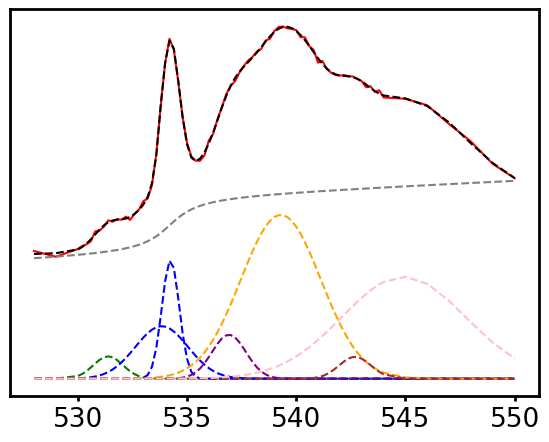

In [488]:
fig, ax2 = plt.subplots(1,1)

intensity = y3
plt.plot(energy, intensity, label='Original Spectrum',color='red')
plt.plot(energy, result.best_fit, label='Fit', linestyle='--',color='k')
plt.plot(energy, arctangent_step(energy, initial_step_height, initial_step_center, initial_step_width, initial_linear_slope),
         label='Initial Arctangent', linestyle='--', color='gray')

plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss1_amplitude'].value,
         result.params['gauss1_center'].value, result.params['gauss1_sigma'].value)),
         label='Fitted Gaussian 1', linestyle='--', color='green')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss2_amplitude'].value,
         result.params['gauss2_center'].value, result.params['gauss2_sigma'].value)),
         label='Fitted Gaussian 2', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss3_amplitude'].value,
         result.params['gauss3_center'].value, result.params['gauss3_sigma'].value)),
         label='Fitted Gaussian 3', linestyle='--', color='blue')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss4_amplitude'].value,
         result.params['gauss4_center'].value, result.params['gauss4_sigma'].value)),
         label='Fitted Gaussian 4', linestyle='--', color='purple')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss5_amplitude'].value,
         result.params['gauss5_center'].value, result.params['gauss5_sigma'].value)),
         label='Fitted Gaussian 5', linestyle='--', color='orange')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss6_amplitude'].value,
         result.params['gauss6_center'].value, result.params['gauss6_sigma'].value)),
         label='Fitted Gaussian 6', linestyle='--', color='brown')
plt.plot(energy, np.abs(gaussian_peak(energy, result.params['gauss7_amplitude'].value,
         result.params['gauss7_center'].value, result.params['gauss7_sigma'].value)),
         label='Fitted Gaussian 7', linestyle='--', color='pink')
#plt.legend()


plt.tight_layout()
plt.yticks([])
#plt.show()
for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
        ax2.tick_params(which='minor',width=2)
        #ax2.tick_params(which='minor',width=2)
# Display the fit parameters


In [124]:
y3[-1]-y3[0]

0.47416174153548374

In [39]:
-0.94+2.49*data.reshape(-1,data.shape[2])[ans[1][1]].mean(0)

array([0.64143636, 0.6510691 , 0.79879239, 0.91563571, 1.05795371,
       1.19438394, 1.29881639, 1.36568274, 1.39236602, 1.39888136,
       1.39378985, 1.37711578, 1.35931404, 1.3477646 , 1.33319877,
       1.33209915, 1.31850033, 1.32088546, 1.31549998, 1.32677651,
       1.36277468, 1.42641201, 1.47375661, 1.4996542 , 1.47885092,
       1.42591959, 1.36148549, 1.29254341, 1.23565392, 1.19826846,
       1.1708105 , 1.15648617, 1.16278562, 1.17382684, 1.18796977,
       1.20820828, 1.23182877, 1.24999646, 1.27318671, 1.30219818,
       1.32836443, 1.34628672, 1.36460901, 1.39027063, 1.40538568,
       1.42830588, 1.44594892, 1.46232472, 1.47262497, 1.4881801 ,
       1.50352171, 1.51249519, 1.52202841, 1.53058425, 1.53329713,
       1.53751748, 1.54814438, 1.55101223, 1.55094128, 1.55000239,
       1.55678247, 1.54727187, 1.55030308, 1.54442423, 1.54054828,
       1.53794471, 1.52993015, 1.51911424, 1.5077311 , 1.50169864,
       1.49152227, 1.48082938, 1.46967812, 1.43194944, 1.37661

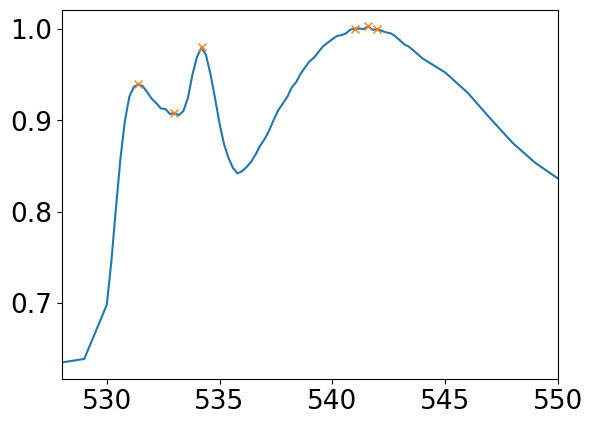

array([531.4, 533. , 534.2, 541. , 541.6, 542. ])

In [24]:
from scipy.signal import find_peaks
x=data.reshape(-1,data.shape[2])[ans[1][1]].mean(0)
peaks, _ = find_peaks(x, height=0)
plt.plot(energy,x)
plt.plot(energy[peaks],x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.xlim([528,550])
plt.show()
energy[peaks]

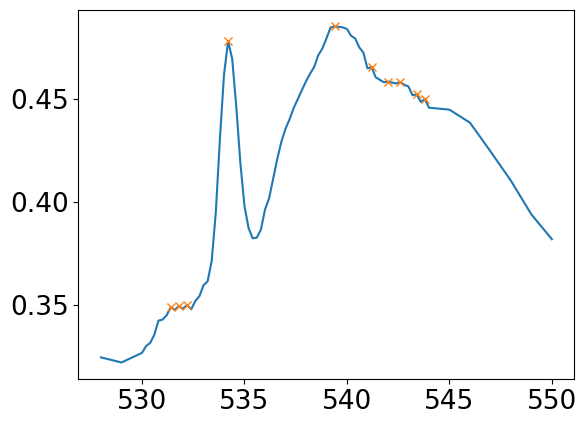

array([531.4, 531.8, 532.2, 534.2, 539.4, 541.2, 542. , 542.6, 543.4,
       543.8])

In [25]:
from scipy.signal import find_peaks
x=data.reshape(-1,data.shape[2])[ans[1][3]].mean(0)
peaks, _ = find_peaks(x, height=0)
plt.plot(energy,x)
plt.plot(energy[peaks],x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
energy[peaks]

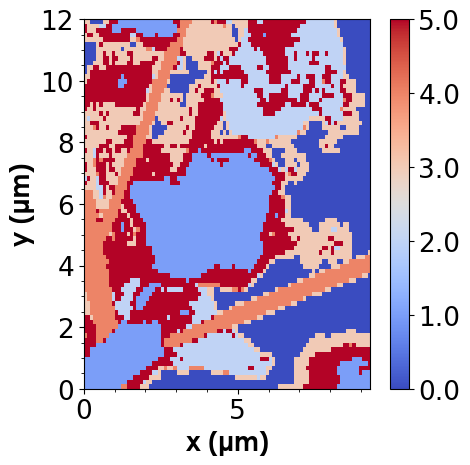

In [283]:
cluster_plot = plt.imshow(ans[0], cmap='coolwarm')
scale(ans[0],resox,resoy, 'coolwarm')
used_colors = cluster_plot.cmap(cluster_plot.norm(np.unique(ans[0])))

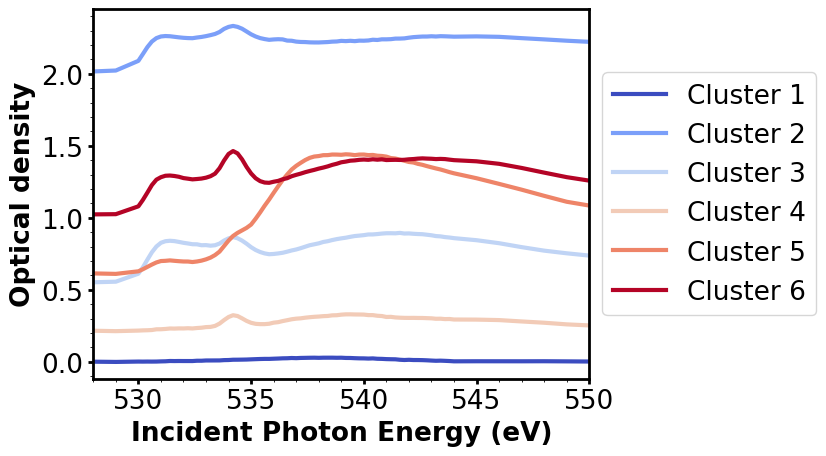

In [284]:
fig, ax2 = plt.subplots(1,1)
for i in range (6):
    idx=ans[1][i]
    plt.plot(energy,data.reshape(-1,data.shape[2])[idx].mean(0),c=used_colors[i],linewidth=3.0,label='Cluster '+str(i+1))
    plt.rcParams['font.size'] = '18'
    plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
    matplotlib.rcParams.update({'font.size': 19})
    plt.ylabel('Optical density',weight="bold", fontsize=19)
    plt.minorticks_on()
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
    plt.xlim([528,550])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

Clustered Image
Mean Spectrum of each cluster


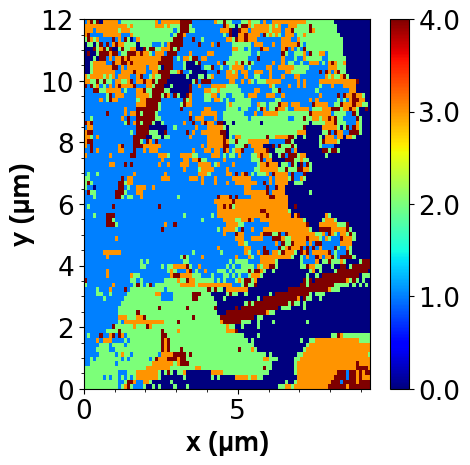

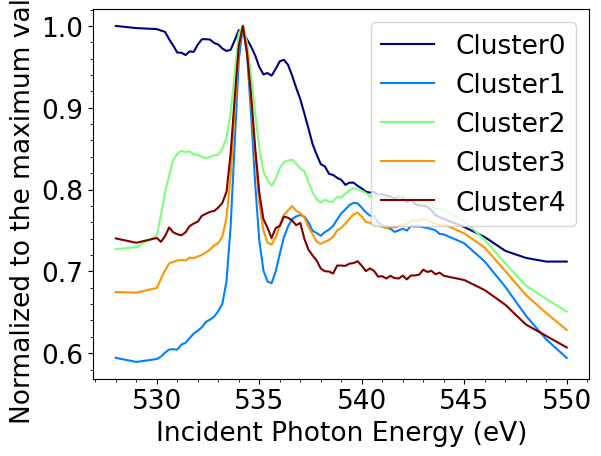

In [295]:
ans_tey=clusteringopt(data_tey_aligned[3:-3,3:-3,:],5, False, energy, 'ICA', 'gmm')

In [287]:
#ans_tey=clusteringopt(data_tey_aligned[3:-3,3:-3,:],4, True, energy, 'PCA', 'kmeans')

Clustered Image
Mean Spectrum of each cluster


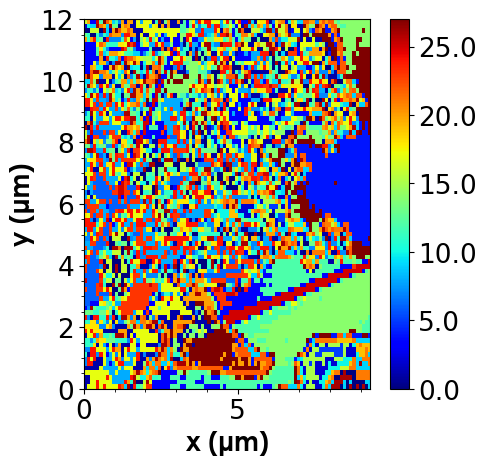

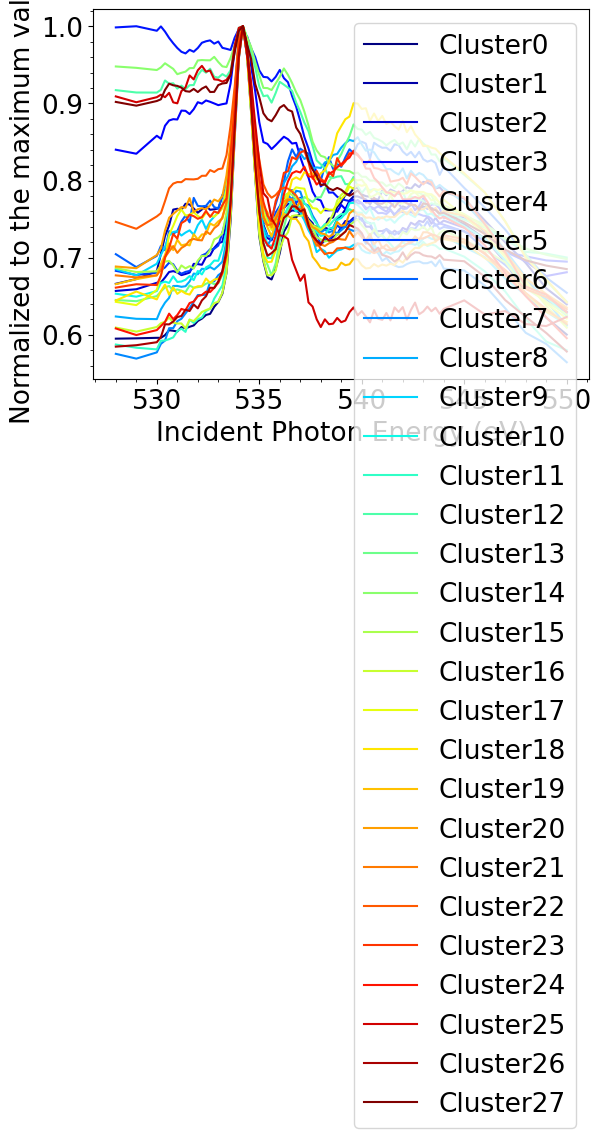

In [286]:
ans_tey=clusteringopt(data_tey_aligned[3:-3,3:-3,:],28, False, energy, 'PCA', 'kmeans')

In [26]:
data=data_tey_aligned[3:-3,3:-3,:]

PCA=sklearn.decomposition.PCA
pca=PCA(n_components=0.999) # specify amount of variance by float value, chooses nb of components accordingly 
H=pca.fit_transform(unfold(data))
H_refold=H.reshape(data.shape[0],data.shape[1],-1)
W=pca.components_.T

In [52]:
W.shape, energy.shape, H_refold.shape

((79, 77), (79,), (80, 93, 77))

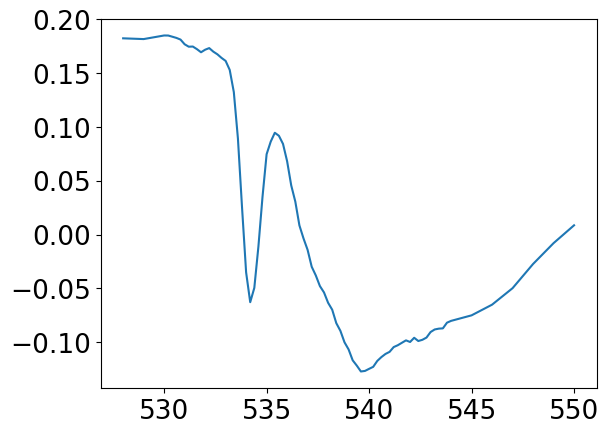

In [53]:
plt.plot(energy, W[:,1])

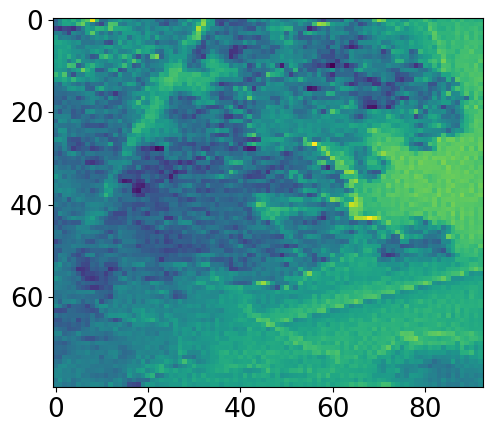

In [54]:
plt.imshow(H_refold[:,:,1])

([], [])

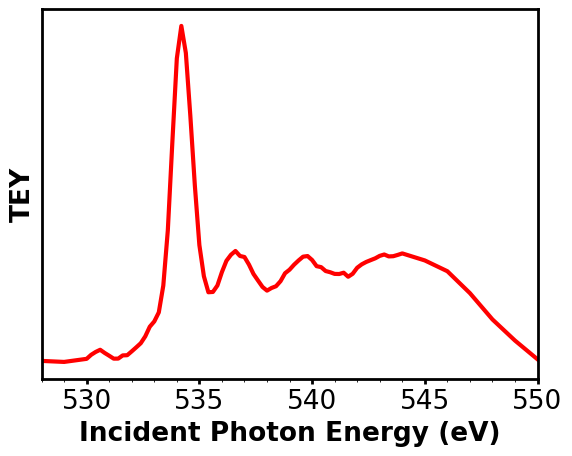

In [309]:
fig, ax2 = plt.subplots(1,1)
y4=W[:,0]
plt.plot(energy, W[:,0],color='red',linewidth=3.0)
plt.rcParams['font.size'] = '18'
plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
matplotlib.rcParams.update({'font.size': 19})
plt.ylabel('TEY',weight="bold", fontsize=19)
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    ax2.tick_params(width=2)
plt.xlim([528,550])
plt.yticks([])
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend()

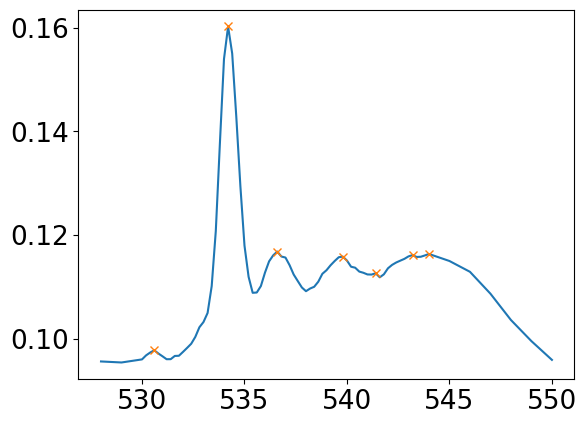

array([530.6, 534.2, 536.6, 539.8, 541.4, 543.2, 544. ])

In [56]:
from scipy.signal import find_peaks
x=W[:,0]
peaks, _ = find_peaks(x, height=0)
plt.plot(energy,x)
plt.plot(energy[peaks],x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
energy[peaks]

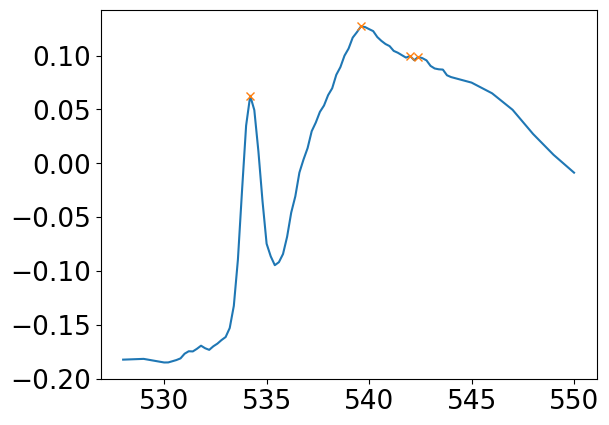

array([534.2, 539.6, 542. , 542.4])

In [57]:
from scipy.signal import find_peaks
x=-W[:,1]
peaks, _ = find_peaks(x, height=0)
plt.plot(energy,x)
plt.plot(energy[peaks],x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()
energy[peaks]

In [ ]:
plt.imshow(H_refold[:,:,1])

In [ ]:
plt.plot(energy, W[:,1])

In [ ]:
plt.plot(energy, W[:,2])

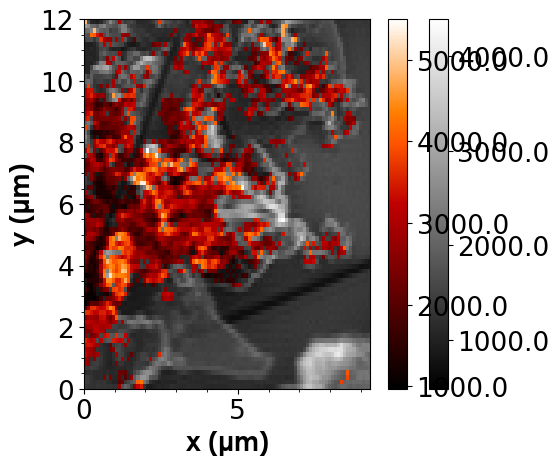

In [348]:
scale((data_tey_aligned[3:-3,3:-3,:].mean(2)), resox, resoy, 'gray')

#cluster_per_pixelnew_tey=ans_tey[0]+1
c1_tey=np.where(cluster_per_pixelnew_tey!=2, 0,cluster_per_pixelnew_tey )
c2_tey=np.where(cluster_per_pixelnew_tey!=2, 0,cluster_per_pixelnew_tey )
c3_tey=np.where(cluster_per_pixelnew_tey!=3, 0,cluster_per_pixelnew_tey )
c4_tey=np.where(cluster_per_pixelnew_tey!=4, 0,cluster_per_pixelnew_tey )
c5_tey=np.where(cluster_per_pixelnew_tey!=5, 0,cluster_per_pixelnew_tey )

n1_tey = masked_array(c1_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c1_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n2_tey = masked_array(c2_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c2_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n3_tey = masked_array(c3_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c3_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n4_tey = masked_array(c4_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c4_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n5_tey = masked_array(c5_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c5_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)

scale(n1_tey, resox, resoy,  'gist_heat')

In [ ]:
noscale((data_tey_aligned[3:-3,3:-3,:].mean(2)), resox, resoy, 'gray')

#cluster_per_pixelnew_tey=ans_tey[0]+1

c2_tey=np.where(cluster_per_pixelnew_tey!=2, 0,cluster_per_pixelnew_tey )
c3_tey=np.where(cluster_per_pixelnew_tey!=3, 0,cluster_per_pixelnew_tey )
c4_tey=np.where(cluster_per_pixelnew_tey!=4, 0,cluster_per_pixelnew_tey )
c5_tey=np.where(cluster_per_pixelnew_tey!=5, 0,cluster_per_pixelnew_tey )
c6_tey=np.where(cluster_per_pixelnew_tey!=6, 0,cluster_per_pixelnew_tey )
c7_tey=np.where(cluster_per_pixelnew_tey!=7, 0,cluster_per_pixelnew_tey )

n2_tey = masked_array(c2_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c2_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n3_tey = masked_array(c3_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c3_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n4_tey = masked_array(c4_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c4_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n5_tey = masked_array(c5_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c5_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n6_tey = masked_array(c6_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c6_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
n7_tey = masked_array(c7_tey*data_tey_aligned[3:-3,3:-3,:].mean(2), c7_tey*data_tey_aligned[3:-3,3:-3,:].mean(2) == 0)
noscale(n2, resox, resoy,  'Greens')
noscale(n4_tey, resox, resoy,  'gist_heat')

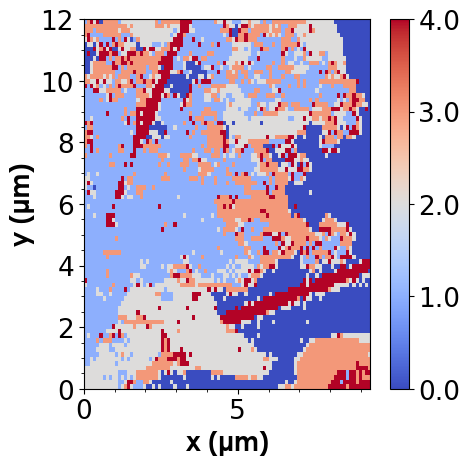

In [301]:
cluster_plot_tey = plt.imshow(ans_tey[0], cmap='coolwarm')
scale(ans_tey[0],resox,resoy, 'coolwarm')
used_colors_tey = cluster_plot_tey.cmap(cluster_plot.norm(np.unique(ans_tey[0])))

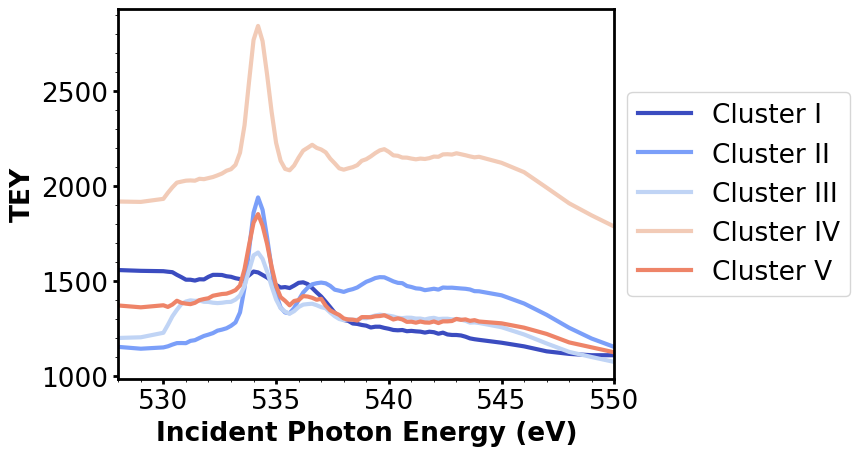

In [302]:
fig, ax2 = plt.subplots(1,1)
for i in range (5):
    idx_tey=ans_tey[1][i]
    plt.plot(energy,data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0),c=used_colors_tey[i],linewidth=3.0,label='Cluster '+solve(i+1))
    plt.rcParams['font.size'] = '18'
    plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
    matplotlib.rcParams.update({'font.size': 19})
    plt.ylabel('TEY',weight="bold", fontsize=19)
    plt.minorticks_on()
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
    plt.xlim([528,550])
    #plt.yticks([])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

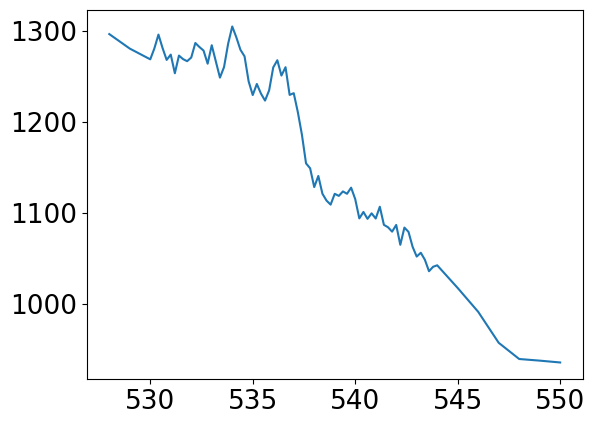

In [337]:
#scale(data_tey_aligned[80:-3,34:-42,:].mean(2),resoy,resoy,'gray')
roi_sin=data_tey_aligned[80:-3,34:-42,:]
plt.plot(energy,unfold(roi_sin).mean(0))

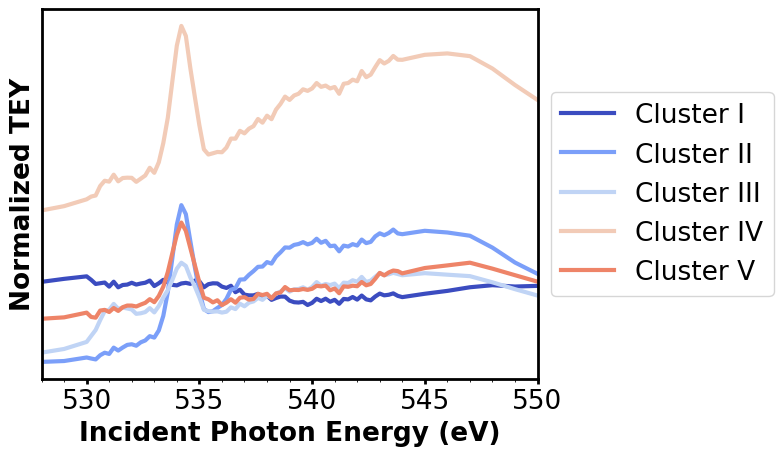

In [338]:
fig, ax2 = plt.subplots(1,1)
for i in range (5):
    idx_tey=ans_tey[1][i]
    plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/unfold(roi_sin).mean(0),c=used_colors_tey[i],linewidth=3.0,label='Cluster '+solve(i+1))
    plt.rcParams['font.size'] = '18'
    plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
    matplotlib.rcParams.update({'font.size': 19})
    plt.ylabel('Normalized TEY',weight="bold", fontsize=19)
    plt.minorticks_on()
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
    plt.xlim([528,550])
    plt.yticks([])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

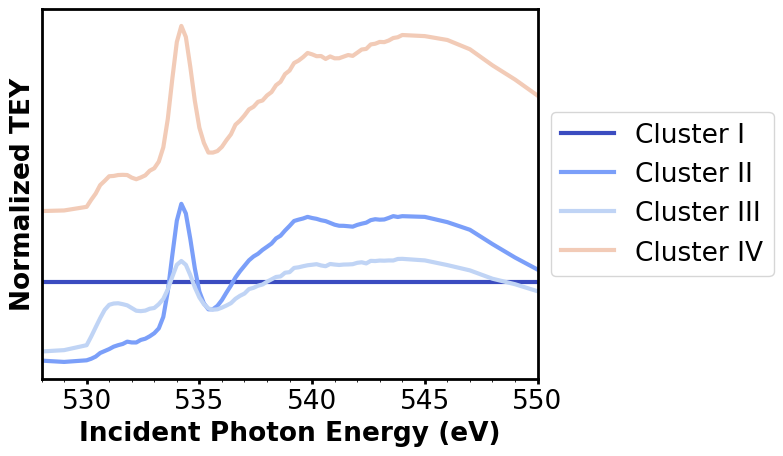

In [343]:
fig, ax2 = plt.subplots(1,1)
for i in range (4):
    idx_tey=ans_tey[1][i]
    plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][0]].mean(0)),c=used_colors_tey[i],linewidth=3.0,label='Cluster '+solve(i+1))
    plt.rcParams['font.size'] = '18'
    plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
    matplotlib.rcParams.update({'font.size': 19})
    plt.ylabel('Normalized TEY',weight="bold", fontsize=19)
    plt.minorticks_on()
    for axis in ['top','bottom','left','right']:
        ax2.spines[axis].set_linewidth(2)
        ax2.tick_params(width=2)
    plt.xlim([528,550])
    plt.yticks([])
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

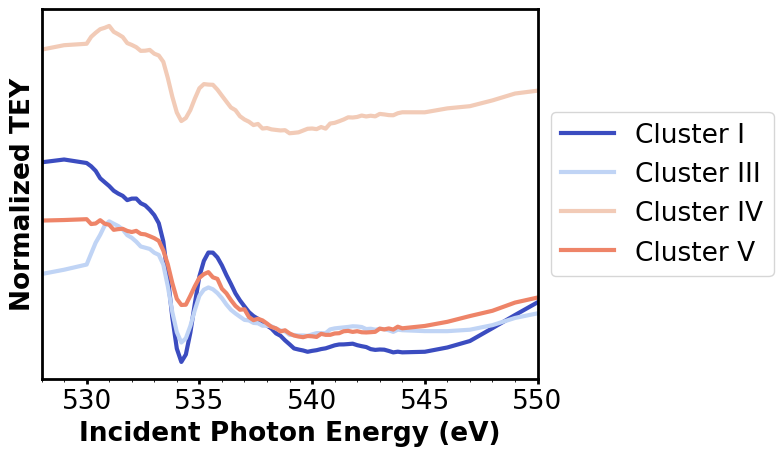

In [344]:
fig, ax2 = plt.subplots(1,1)
idx_tey=ans_tey[1][0]
plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[0],linewidth=3.0,label='Cluster '+solve(0+1))
#idx_tey=ans_tey[1][1]
#plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[1],linewidth=3.0,label='Cluster '+solve(1+1))
idx_tey=ans_tey[1][2]
plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[2],linewidth=3.0,label='Cluster '+solve(2+1))
idx_tey=ans_tey[1][3]
plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[3],linewidth=3.0,label='Cluster '+solve(3+1))
idx_tey=ans_tey[1][4]
plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[4],linewidth=3.0,label='Cluster '+solve(4+1))
#idx_tey=ans_tey[1][5]
#plt.plot(energy,(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[idx_tey].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0)),c=used_colors_tey[5],linewidth=3.0,label='Cluster '+solve(5+1))
plt.rcParams['font.size'] = '18'
plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
matplotlib.rcParams.update({'font.size': 19})
plt.ylabel('Normalized TEY',weight="bold", fontsize=19)
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    ax2.tick_params(width=2)
plt.xlim([528,550])
plt.yticks([])
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

([], [])

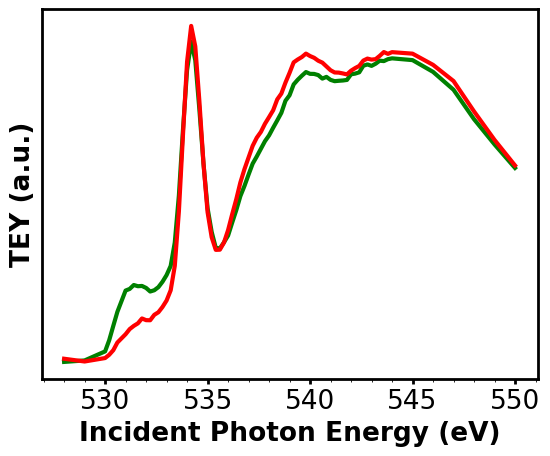

In [371]:
fig, ax2 = plt.subplots(1,1)
y_tey_mxene=1.2*(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans[1][1]].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][0]].mean(0))
y_tey_electrolyte=-0.023+1.33*(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][0]].mean(0))
plt.plot(energy,1.2*(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans[1][1]].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][0]].mean(0)),c='green',linewidth=3.0,label='MXene')
plt.plot(energy,-0.023+1.33*(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][1]].mean(0))/(data_tey_aligned[3:-3,3:-3,:].reshape(-1,data_tey_aligned[3:-3,3:-3,:].shape[2])[ans_tey[1][0]].mean(0)),c='red',linewidth=3.0,label='Electrolyte')
plt.rcParams['font.size'] = '18'
plt.xlabel('Incident Photon Energy (eV)',weight="bold", fontsize=19)
matplotlib.rcParams.update({'font.size': 19})
plt.ylabel('TEY (a.u.)',weight="bold", fontsize=19)
plt.minorticks_on()
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    ax2.tick_params(width=2)
#plt.xlim([528,550])
#plt.ylim([1,1.7])
plt.yticks([])
#ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend()

### $$\textbf{A. Multi-layered MXene at O K-edge, electrochemically cycled for 2 cycles (from 3V to 0V)}$$
<hr>

In [ ]:
#loading stxm data
filename='MPI_210722182'
f=h5py.File(filename+'.hdf','r')
energy=f['exchange/energy'][...]
data_trans=np.transpose((f['exchange/data'][...]),(1,0,2))
print(list(f.keys()))
print('Transmission image')
data_trans_unfold=data_trans.reshape(data_trans.shape[0]* data_trans.shape[1], data_trans.shape[2])
resox=round(float((-f['exchange/x'][...][0]+f['exchange/x'][...][-1])/f['exchange/x'][...].shape),2)
resoy=round(float((-f['exchange/y'][...][0]+f['exchange/y'][...][-1])/f['exchange/y'][...].shape),2)
scale(data_trans.mean(2),resox,resoy,'gray')
scale(data_trans.mean(2), resox, resoy,'gray')
#loading tey data
filename1=filename+'/'+filename+'_b'
data_tey=np.zeros((data_trans.shape[0],data_trans.shape[1], data_trans.shape[2]))

In [ ]:
##the measurement 034 is problematic
for i in range(0, data_trans.shape[2], 1):    
 layer=np.genfromtxt(filename1+f"{i:03d}.xim")
 #layer = np.array(layer)
 data_tey[:,:,i]=layer
#data_tey=np.transpose(data_tey, (1,0,2)) 
scale(data_tey.sum(2), resox, resoy,'gray')
#plt.imshow(data_tey.sum(2), cmap='gray')
print('Total electron yield image')

In [ ]:
####aligning stxm data##
shift=(alignment(data_tey))[0]
data_aligned=(alignment(data_tey))[1]
print('shifts')
plt.scatter(np.arange(0,shift[0].shape[0]),shift[0])
plt.scatter(np.arange(0,shift[1].shape[0]),shift[1])

In [ ]:
###result images####
print('Transmission image after alignment, averaged over the energies')
scale(data_aligned.mean(2), resox, resoy,'gray')
#########io subtraction##############

In [ ]:
ans=clusteringopt(data_aligned[3:-3,3:-3,:],6, False, energy, 'ICA', 'gmm')

*  this is a non-conductive MXene flake. Its upper part is below the bigger flake and it is bottom part on top of the other flake
*  there is no electron transport on this flake beacuse it is not touching sufficiently with the other MXene flakes or the substrate. Hence, the inexistence of TEY signal doesnt come from charging phenomenon. As a result, the Io correction associated with the drop of TEY signal due to charging phenomenon is not applicable here.

# $$\textbf{Thank you for your attention.}$$